# **DQN Classic Control - Mountain Car**


#1. **Student name:** Adeeb Naiyer (23136316)

#2. The code executes till the end without an error.

#3. Third-party implementations:

https://blog.paperspace.com/getting-started-with-openai-gym/

https://github.com/pylSER/Deep-Reinforcement-learning-Mountain-Car

https://gist.github.com/gkhayes/3d154e0505e31d6367be22ed3da2e955

https://github.com/omerbsezer/Qlearning_MountainCar


In [1]:
# Install the specific version of gym required for the environment, ensuring compatibility.
%pip install -q -U gym[classic_control,atari,accept-rom-license]==0.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Import the sys module to access system-specific parameters and functions.
import sys
# Assert that the current Python interpreter's version is at least 3.10.
assert sys.version_info >= (3,10)

# Import the os module to interact with the operating system.
import os
# Set an environment variable for the SDL video driver to 'dummy' to run headless simulations.
os.environ['SDL_VIDEODRIVER'] = 'dummy'

# Import the gym library, used for developing and comparing reinforcement learning algorithms.
import gym

# Import animation support from matplotlib, a plotting library.
import matplotlib.animation
# Import the pyplot interface of matplotlib for plotting graphs.
import matplotlib.pyplot as plt

# Import numpy, a fundamental package for scientific computing in Python.
import numpy as np

# Import pygame, a set of Python modules designed for writing video games.
import pygame

# Import RecordVideo to wrap gym environments to record videos.
from gym.wrappers.record_video import RecordVideo

# Import glob, a module to retrieve files/pathnames matching a specified pattern.
import glob

# Import io, a module that provides the Python interfaces to stream handling.
import io

# Import base64, a module to encode binary data into ASCII characters.
import base64

# Import HTML from IPython.display to embed HTML content in Jupyter notebooks.
from IPython.display import HTML
# Import display tools from IPython to display complex visualizations.
from IPython import display as ipythondisplay

# Import version parsing module from the packaging library.
from packaging import version

# Import TensorFlow, an open source machine learning framework.
import tensorflow as tf

# Assert that the installed TensorFlow version is at least 2.15.0.
assert version.parse(tf.__version__) >= version.parse("2.15.0")


In [3]:
# Check if there are any GPUs available via TensorFlow's configuration
if not tf.config.list_physical_devices('GPU'):
    # If no GPUs are detected, print a message suggesting to get a GPU.
    print("Get a GPU ......")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Access the registry of all available environments in the Gym library.
envs = gym.envs.registry
sorted(envs.keys()) + ["..."]

['ALE/Adventure-ram-v5',
 'ALE/Adventure-v5',
 'ALE/AirRaid-ram-v5',
 'ALE/AirRaid-v5',
 'ALE/Alien-ram-v5',
 'ALE/Alien-v5',
 'ALE/Amidar-ram-v5',
 'ALE/Amidar-v5',
 'ALE/Assault-ram-v5',
 'ALE/Assault-v5',
 'ALE/Asterix-ram-v5',
 'ALE/Asterix-v5',
 'ALE/Asteroids-ram-v5',
 'ALE/Asteroids-v5',
 'ALE/Atlantis-ram-v5',
 'ALE/Atlantis-v5',
 'ALE/Atlantis2-ram-v5',
 'ALE/Atlantis2-v5',
 'ALE/Backgammon-ram-v5',
 'ALE/Backgammon-v5',
 'ALE/BankHeist-ram-v5',
 'ALE/BankHeist-v5',
 'ALE/BasicMath-ram-v5',
 'ALE/BasicMath-v5',
 'ALE/BattleZone-ram-v5',
 'ALE/BattleZone-v5',
 'ALE/BeamRider-ram-v5',
 'ALE/BeamRider-v5',
 'ALE/Berzerk-ram-v5',
 'ALE/Berzerk-v5',
 'ALE/Blackjack-ram-v5',
 'ALE/Blackjack-v5',
 'ALE/Bowling-ram-v5',
 'ALE/Bowling-v5',
 'ALE/Boxing-ram-v5',
 'ALE/Boxing-v5',
 'ALE/Breakout-ram-v5',
 'ALE/Breakout-v5',
 'ALE/Carnival-ram-v5',
 'ALE/Carnival-v5',
 'ALE/Casino-ram-v5',
 'ALE/Casino-v5',
 'ALE/Centipede-ram-v5',
 'ALE/Centipede-v5',
 'ALE/ChopperCommand-ram-v5',
 'ALE/

In [ ]:
envs['MountainCar-v0']

EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0)

In [4]:
# Define a function called wrap_env that takes one parameter: env.
def wrap_env(env):
    # Create an environment using the gym library. Here, the 'MountainCar-v0' environment is chosen.
    # The 'render_mode' is set to "rgb_array" to retrieve the render output as an array of RGB values.
    env = gym.make('MountainCar-v0', render_mode="rgb_array")

    # Wrap the environment with RecordVideo to capture video of each episode.
    # The videos are saved in the './video' directory.
    # The episode_trigger is a lambda function that always returns True,
    # meaning it will record every episode.
    env = RecordVideo(env, './video', episode_trigger=lambda episode_number: True)

    # Reset the environment to its initial state and return this state.
    env.reset()

    # Return the modified environment, which now includes the ability to record videos.
    return env


In [5]:
# Set the new_step_API flag to True. This variable might be used to indicate whether to use the new or old step API in Gym environments.
new_step_API = True
# Create an environment instance using Gym for the 'MountainCar-v0' game.
# The gym.make function initializes the specified environment.
env = wrap_env(gym.make('MountainCar-v0'))

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [6]:
# The `reset` method initializes the environment's state and returns the initial observation.
obs = env.reset(seed=42)
obs
for e in env.step(1):
    print(e)

[-0.4457913  -0.00058252]
-1.0
False
{}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [25]:
# Initialize all imported pygame modules.
pygame.init()
# Retrieve and print a list of available display modes for the current display.
# This can help in setting up the video mode and understanding display capabilities.
display_modes = pygame.display.list_modes()
env.reset(seed=42)
# Render the environment's current state and store it as an image. This is typically used for visualizing the state.
img = env.render()

np.random.seed(42)
tf.random.set_seed(42)
# Initialize a list to store the rewards for each step or episode.
rewards = []
best_score = 199
epsilon = 1
epsilon_min = .01
epsilon_decay = .995
# Initialize lists to keep track of loss values, epsilon values, and step values.
# These are useful for monitoring the training process.
loss_val =[]
epsilon_val =[]
step_val = []
action_history = []

In [26]:
tf.random.set_seed(42)

input_shape = [2]
n_outputs = 3
# Create a sequential model using TensorFlow's Keras API. A sequential model is appropriate
# for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    # Add a fully connected (dense) layer with 64 neurons and ReLU activation function.
    # The input shape is specified to match the shape of the input data.
    tf.keras.layers.Dense(64, activation="relu", input_shape=input_shape),
    # Add another fully connected (dense) layer with 64 neurons and ReLU activation function.
    tf.keras.layers.Dense(64, activation="relu"),
       # Add a final fully connected (dense) layer with a number of neurons equal to the number of outputs.
    # No activation function is used in this layer, which is typical for output layers in many cases
    # such as regression or policy output in reinforcement learning.
    tf.keras.layers.Dense(n_outputs)
])

In [29]:
# Assuming `model` and `n_outputs` have been defined earlier:
# `model` is a trained neural network model.
# `n_outputs` is the number of possible actions the agent can take.
def epsilon_greedy_policy(state, epsilon):
    """
    Selects an action using an epsilon-greedy policy.

    Args:
    state (array-like): The current state of the environment.
    epsilon (float): The probability of choosing a random action. This value dictates
                     the trade-off between exploration and exploitation.

    Returns:
    int: The action selected according to the epsilon-greedy policy.
    """

    # Generate a random float in the [0, 1) range.
    # If this number is less than epsilon, a random action is chosen. This represents exploration.
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
       # Exploitation: predict the action values (Q-values) from the model for the given state.
        # The state is reshaped (state[np.newaxis]) to fit the model's input requirements.
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
         # Select the action with the highest Q-value. This action is expected to have the highest return.
        return Q_values.argmax()

In [30]:
# Import the deque class from the collections module, which provides a list-like container with fast appends and pops.
from collections import deque
# Initialize a deque with a maximum length of 2000. This sets up a 'replay buffer'.
# A replay buffer is used in reinforcement learning algorithms to store experiences gathered during training.
# These experiences are then randomly sampled to update the model, which helps in stabilizing the learning process
# and breaking correlation between consecutive learning samples.
replay_buffer = deque(maxlen=2000)
# The 'maxlen' parameter ensures that the deque cannot grow beyond 2000 elements. Once it reaches this size,
# older elements will be automatically removed from the deque when new elements are added.
# This allows the buffer to contain a recent history of experiences without memory overflow.

In [31]:
def sample_experiences(batch_size):
    """
    Samples a batch of experiences from the replay buffer for training.

    Args:
    batch_size (int): The number of experiences to sample from the buffer.

    Returns:
    list: A list of numpy arrays, where each array corresponds to one component of the experience tuples.
          Typically, these components are states, actions, rewards, next_states, and dones.
    """

    # Generate random indices based on the length of the replay buffer.
    # These indices are used to randomly select experiences from the buffer to form a batch.
    indices = np.random.randint(len(replay_buffer), size=batch_size)
     # Retrieve the experiences using the indices. This creates a list of experiences,
    # where each experience itself is a tuple (or list) of elements such as state, action, reward, next_state, and done.
    batch = [replay_buffer[index] for index in indices]
    # Organize the batch data by experience tuple fields (e.g., all states together, all actions together, etc.)
    # This comprehension iterates over each field index (0 to 4 if tuples are (state, action, reward, next_state, done)).
    # It constructs a numpy array for each field from the experiences in the batch.
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)
    ]
# This function is integral to the learning process in many reinforcement learning algorithms,
# as it provides the data needed to update the model based on a diverse sample of past experiences,
# rather than on a stream of experiences that may be highly inter-correlated.

In [32]:
def play_one_step(env, state, epsilon):
    """
    Plays one step in the environment using an epsilon-greedy policy and records the experience.

    Args:
    env: The environment object where the agent interacts.
    state: The current state of the environment.
    epsilon: The probability of choosing a random action (exploration).

    Returns:
    tuple: The next state, the reward received, whether the episode has ended, and extra info.
    """

    # Compute the action to take based on the current state and epsilon.
    # The action is chosen using the epsilon-greedy policy which balances exploration and exploitation.
    action = epsilon_greedy_policy(state, epsilon)
    # Append the action taken to the action history for analysis and debugging.
    action_history.append(action)
     # Take the action in the environment and get the results:
    # next_state: the state of the environment after the action
    # reward: the immediate reward received after taking the action
    # done: boolean indicating whether the episode has ended
    # info: additional info about the environment or the action taken
    next_state, reward, done, info = env.step(action)
    # Modify the reward based on specific conditions to shape the agent's behavior.
    # Increase the reward if the agent moves right when the action was to move right.
    if next_state[0] - state[0] > 0 and action == 2: reward = 1
    # Increase the reward if the agent moves left when the action was to move left.
    if next_state[0] - state[0] < 0 and action == 0: reward = 1
     # Append the experience to the replay buffer. Each experience is stored as a tuple of:
    # (current state, action taken, reward received, next state, episode done flag).
    replay_buffer.append((state, action, reward, next_state, done))
    # Return the results of taking the action.
    return next_state, reward, done, info

# This function allows the agent to interact with the environment in a controlled manner,
# collecting experiences that are essential for learning and refining policies.

In [33]:
# Clone the existing model. This creates a new model that has the same architecture as the original but without any trained weights.
target = tf.keras.models.clone_model(model)
# Set the weights of the cloned model ('target') to be identical to those of the original model ('model').
# This is typically done in reinforcement learning algorithms like Deep Q-Networks (DQN),
# where a target network helps provide a stable target during training updates.
target.set_weights(model.get_weights())

# At this point, 'target' is an exact copy of 'model' in terms of both architecture and weights.
# This can be useful for implementing techniques such as Fixed Q-Targets, where the target network's weights are held fixed and only updated periodically from the primary network, reducing correlations between the target and predicted Q-values.

In [ ]:
batch_size = 64
discount_factor = 0.95
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.mean_squared_error

def training_step(batch_size):
    """
    Performs a single training step including sampling experiences, calculating target Q-values,
    and updating the model weights.

    Args:
    batch_size (int): Number of experiences to sample from the replay buffer.
    """

    # Sample experiences from the replay buffer.
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
     # Append the actions from the batch to the action history for monitoring or debugging purposes.
    action_history.append(actions)
    # Predict the Q-values for the next states using the target network. This prediction is done
    # without the extra information that might influence learning (i.e., in a non-verbose mode).
    next_Q_values = target.predict(next_states, verbose=0)
    # Compute the maximum Q-value for each next state. This is part of the Double DQN approach,
    # where the best possible next action is considered for Q-value estimation.
    max_next_Q_values = next_Q_values.max(axis=1)
    # Compute the mask for non-terminal states. This is important as terminal states (where the episode ends)
    # should not lead to future state Q-value updates.

    runs = 1.0 - (dones)
    # Calculate the target Q-values using the formula:
    # Q_target = reward + discount_factor * max_next_Q_value * run
    # This incorporates immediate rewards and discounted future rewards.
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    # Reshape target Q-values to match the expected shape for loss calculation.
    target_Q_values = target_Q_values.reshape(-1, 1)
     # Create a mask to filter the Q-values of the chosen actions using one-hot encoding.
    mask = tf.one_hot(actions, n_outputs)
     # Begin a gradient tape context to automatically compute gradients that are used to update the model.
    with tf.GradientTape() as tape:
       # Predict all Q-values for the current states using the main network.
        all_Q_values = model(states)
         # Use the mask to fetch the Q-values corresponding to the taken actions.
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
         # Calculate the loss using the mean squared error between the predicted Q-values and the target Q-values.
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
        print("Loss value : ",loss)
         # Append the current loss to the loss tracking list.
        loss_val.append(loss)
    # Compute the gradients of the loss with respect to the model's trainable variables.
    grads = tape.gradient(loss, model.trainable_variables)
    # Apply the gradients to the model's variables to minimize the loss function using the optimizer.
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
# Assuming global variables and required functions (e.g., play_one_step, training_step) have been properly defined.
# Import necessary libraries or modules if not already done.

# Set the number of episodes for the training process.
episodes=600
# Begin the training loop, iterating over each episode.
for episode in range(episodes):
    obs = env.reset()
    print("\n obs :::: ",obs)
    # Iterate over a maximum of 200 steps per episode unless the episode ends early.
    for step in range(200):
        # epsilon = max(1 - episode/(episodes*0.8), 0.01)
        # Perform one step in the environment using the current observation and epsilon.
        obs, reward, done, info  = play_one_step(env,obs, epsilon)
        # If the episode is done (e.g., the goal is reached or a terminal state), exit the loop.
        if done:
            break
    # Append the current epsilon value to a tracking list after each episode.
    epsilon_val.append(epsilon)
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",end="")
    # Append the last reward of the episode to a list, and the number of steps taken to another list.
    rewards.append(reward)
    step_val.append(step)
    # Decay epsilon by a factor, ensuring it does not fall below the minimum epsilon value.
    if epsilon > epsilon_min:
      epsilon *= epsilon_decay
    # Every 50 episodes, synchronize the target model's weights with the main model's weights.
    if episode % 50 == 0:
      target.set_weights(model.get_weights())
    # Update best score and best weights if the current episode's step count is less than the best score observed so far.
    if step <= best_score:
        best_weights = model.get_weights()
        best_score = step
    # Print the current best score and epsilon value
    print("\rEpisode: {}, Best Score: {}, eps: {:.3f}".format(episode, best_score, epsilon), end="")
    # Start training the model using experiences sampled from the replay buffer after 50 episodes have been completed.
    if episode > 50:
        training_step(batch_size)
# After all episodes are complete, set the model's weights to the best observed weights.
model.set_weights(best_weights)


 obs ::::  [-0.5122243  0.       ]
Episode: 0, Best Score: 199, eps: 0.995
 obs ::::  [-0.4282804  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 1, Best Score: 199, eps: 0.990
 obs ::::  [-0.4605264  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 2, Best Score: 199, eps: 0.985
 obs ::::  [-0.58116454  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 3, Best Score: 199, eps: 0.980
 obs ::::  [-0.40487552  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 4, Best Score: 199, eps: 0.975

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44777206  0.        ]
Episode: 5, Best Score: 199, eps: 0.970
 obs ::::  [-0.44278714  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 6, Best Score: 199, eps: 0.966
 obs ::::  [-0.5743773  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 7, Best Score: 199, eps: 0.961
 obs ::::  [-0.5099228  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 8, Best Score: 199, eps: 0.956
 obs ::::  [-0.5258404  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 9, Best Score: 199, eps: 0.951
 obs ::::  [-0.414647  0.      ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 10, Best Score: 199, eps: 0.946

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.471227  0.      ]
Episode: 11, Best Score: 199, eps: 0.942
 obs ::::  [-0.43544766  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 12, Best Score: 199, eps: 0.937
 obs ::::  [-0.51131713  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 13, Best Score: 199, eps: 0.932
 obs ::::  [-0.55455226  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 14, Best Score: 199, eps: 0.928
 obs ::::  [-0.48908305  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 15, Best Score: 199, eps: 0.923

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5872365  0.       ]
Episode: 16, Best Score: 199, eps: 0.918
 obs ::::  [-0.43447375  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 17, Best Score: 199, eps: 0.914
 obs ::::  [-0.47366711  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 18, Best Score: 199, eps: 0.909
 obs ::::  [-0.44838244  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 19, Best Score: 199, eps: 0.905
 obs ::::  [-0.5290948  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 20, Best Score: 199, eps: 0.900
 obs ::::  [-0.4058604  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 21, Best Score: 199, eps: 0.896
 obs ::::  [-0.42137578  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 22, Best Score: 199, eps: 0.891
 obs ::::  [-0.4443233  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 23, Best Score: 199, eps: 0.887
 obs ::::  [-0.56107223  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 24, Best Score: 199, eps: 0.882

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5066558  0.       ]
Episode: 25, Best Score: 199, eps: 0.878
 obs ::::  [-0.5912393  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 26, Best Score: 199, eps: 0.873
 obs ::::  [-0.5691421  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 27, Best Score: 199, eps: 0.869
 obs ::::  [-0.4633902  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 28, Best Score: 199, eps: 0.865
 obs ::::  [-0.45104757  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 29, Best Score: 199, eps: 0.860
 obs ::::  [-0.40649804  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 30, Best Score: 199, eps: 0.856
 obs ::::  [-0.5348349  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 31, Best Score: 199, eps: 0.852

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52590805  0.        ]
Episode: 32, Best Score: 199, eps: 0.848
 obs ::::  [-0.50608885  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 33, Best Score: 199, eps: 0.843
 obs ::::  [-0.5621057  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 34, Best Score: 199, eps: 0.839
 obs ::::  [-0.5740157  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 35, Best Score: 199, eps: 0.835
 obs ::::  [-0.50485903  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 36, Best Score: 199, eps: 0.831
 obs ::::  [-0.5546181  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 37, Best Score: 199, eps: 0.827
 obs ::::  [-0.4660372  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 38, Best Score: 199, eps: 0.822
 obs ::::  [-0.5125696  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 39, Best Score: 199, eps: 0.818
 obs ::::  [-0.43346435  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 40, Best Score: 199, eps: 0.814
 obs ::::  [-0.459947  0.      ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 41, Best Score: 199, eps: 0.810

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53752667  0.        ]
Episode: 42, Best Score: 199, eps: 0.806
 obs ::::  [-0.43354803  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 43, Best Score: 199, eps: 0.802
 obs ::::  [-0.43904713  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 44, Best Score: 199, eps: 0.798

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5225043  0.       ]
Episode: 45, Best Score: 199, eps: 0.794
 obs ::::  [-0.5423344  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 46, Best Score: 199, eps: 0.790
 obs ::::  [-0.4635009  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 47, Best Score: 199, eps: 0.786

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5720495  0.       ]
Episode: 48, Best Score: 199, eps: 0.782
 obs ::::  [-0.56001836  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 49, Best Score: 199, eps: 0.778
 obs ::::  [-0.59852755  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 50, Best Score: 199, eps: 0.774

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44261512  0.        ]
Episode: 51, Best Score: 199, eps: 0.771Loss value :  tf.Tensor(1.0054314, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46702984  0.        ]
Episode: 52, Best Score: 199, eps: 0.767Loss value :  tf.Tensor(0.97315776, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4589669  0.       ]
Episode: 53, Best Score: 199, eps: 0.763Loss value :  tf.Tensor(0.9813185, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44385418  0.        ]
Episode: 54, Best Score: 199, eps: 0.759Loss value :  tf.Tensor(0.95084846, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50821686  0.        ]
Episode: 55, Best Score: 199, eps: 0.755Loss value :  tf.Tensor(0.9062225, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48625177  0.        ]
Episode: 56, Best Score: 199, eps: 0.751Loss value :  tf.Tensor(0.92631257, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5720406  0.       ]
Episode: 57, Best Score: 199, eps: 0.748Loss value :  tf.Tensor(0.9109503, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57709396  0.        ]
Episode: 58, Best Score: 199, eps: 0.744Loss value :  tf.Tensor(0.91048646, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4663194  0.       ]
Episode: 59, Best Score: 199, eps: 0.740Loss value :  tf.Tensor(0.9199841, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50578076  0.        ]
Episode: 60, Best Score: 199, eps: 0.737Loss value :  tf.Tensor(0.9219091, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48695278  0.        ]
Episode: 61, Best Score: 199, eps: 0.733Loss value :  tf.Tensor(0.9117262, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44700024  0.        ]
Episode: 62, Best Score: 199, eps: 0.729Loss value :  tf.Tensor(0.9292475, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47305635  0.        ]
Episode: 63, Best Score: 199, eps: 0.726Loss value :  tf.Tensor(0.9000153, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48928413  0.        ]
Episode: 64, Best Score: 199, eps: 0.722Loss value :  tf.Tensor(0.920945, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48815855  0.        ]
Episode: 65, Best Score: 199, eps: 0.718Loss value :  tf.Tensor(0.8868484, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53920996  0.        ]
Episode: 66, Best Score: 199, eps: 0.715Loss value :  tf.Tensor(0.8868722, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5938364  0.       ]
Episode: 67, Best Score: 199, eps: 0.711Loss value :  tf.Tensor(0.86906, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5126565  0.       ]
Episode: 68, Best Score: 199, eps: 0.708Loss value :  tf.Tensor(0.8790311, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5570831  0.       ]
Episode: 69, Best Score: 199, eps: 0.704Loss value :  tf.Tensor(0.8661555, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5182943  0.       ]
Episode: 70, Best Score: 199, eps: 0.701Loss value :  tf.Tensor(0.9150375, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42931938  0.        ]
Episode: 71, Best Score: 199, eps: 0.697Loss value :  tf.Tensor(0.89082, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5532121  0.       ]
Episode: 72, Best Score: 199, eps: 0.694Loss value :  tf.Tensor(0.81779677, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58833945  0.        ]
Episode: 73, Best Score: 199, eps: 0.690Loss value :  tf.Tensor(0.9037354, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5437232  0.       ]
Episode: 74, Best Score: 199, eps: 0.687Loss value :  tf.Tensor(0.84214234, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5412812  0.       ]
Episode: 75, Best Score: 199, eps: 0.683Loss value :  tf.Tensor(0.8912461, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4676167  0.       ]
Episode: 76, Best Score: 199, eps: 0.680Loss value :  tf.Tensor(0.865005, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48859358  0.        ]
Episode: 77, Best Score: 199, eps: 0.676Loss value :  tf.Tensor(0.8906126, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44322035  0.        ]
Episode: 78, Best Score: 199, eps: 0.673Loss value :  tf.Tensor(0.9225483, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46713728  0.        ]
Episode: 79, Best Score: 199, eps: 0.670Loss value :  tf.Tensor(0.7470987, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51872265  0.        ]
Episode: 80, Best Score: 199, eps: 0.666Loss value :  tf.Tensor(0.7793282, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43719593  0.        ]
Episode: 81, Best Score: 199, eps: 0.663Loss value :  tf.Tensor(0.8502057, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5666054  0.       ]
Episode: 82, Best Score: 199, eps: 0.660Loss value :  tf.Tensor(0.7644647, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5954576  0.       ]
Episode: 83, Best Score: 199, eps: 0.656Loss value :  tf.Tensor(0.8484577, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5819904  0.       ]
Episode: 84, Best Score: 199, eps: 0.653Loss value :  tf.Tensor(0.8457836, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45552814  0.        ]
Episode: 85, Best Score: 199, eps: 0.650Loss value :  tf.Tensor(0.83736527, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50762457  0.        ]
Episode: 86, Best Score: 199, eps: 0.647Loss value :  tf.Tensor(0.8247586, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5677456  0.       ]
Episode: 87, Best Score: 199, eps: 0.643Loss value :  tf.Tensor(0.90634793, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49979106  0.        ]
Episode: 88, Best Score: 199, eps: 0.640Loss value :  tf.Tensor(0.83803296, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5695376  0.       ]
Episode: 89, Best Score: 199, eps: 0.637Loss value :  tf.Tensor(0.8342241, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46073592  0.        ]
Episode: 90, Best Score: 199, eps: 0.634Loss value :  tf.Tensor(0.88196456, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5107688  0.       ]
Episode: 91, Best Score: 199, eps: 0.631Loss value :  tf.Tensor(0.8450745, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5237958  0.       ]
Episode: 92, Best Score: 199, eps: 0.627Loss value :  tf.Tensor(0.8668692, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5396976  0.       ]
Episode: 93, Best Score: 199, eps: 0.624Loss value :  tf.Tensor(0.8032685, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47394347  0.        ]
Episode: 94, Best Score: 199, eps: 0.621Loss value :  tf.Tensor(0.81657887, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5276375  0.       ]
Episode: 95, Best Score: 199, eps: 0.618Loss value :  tf.Tensor(0.84620804, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58247  0.     ]
Episode: 96, Best Score: 199, eps: 0.615Loss value :  tf.Tensor(0.8693867, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5763988  0.       ]
Episode: 97, Best Score: 199, eps: 0.612Loss value :  tf.Tensor(0.85545367, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40762046  0.        ]
Episode: 98, Best Score: 199, eps: 0.609Loss value :  tf.Tensor(0.7578955, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41828385  0.        ]
Episode: 99, Best Score: 199, eps: 0.606Loss value :  tf.Tensor(0.7464427, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46005857  0.        ]
Episode: 100, Best Score: 199, eps: 0.603Loss value :  tf.Tensor(0.78418887, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.546826  0.      ]
Episode: 101, Best Score: 199, eps: 0.600Loss value :  tf.Tensor(0.69817746, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40616474  0.        ]
Episode: 102, Best Score: 199, eps: 0.597Loss value :  tf.Tensor(0.7924093, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4442498  0.       ]
Episode: 103, Best Score: 199, eps: 0.594Loss value :  tf.Tensor(0.7643398, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45662197  0.        ]
Episode: 104, Best Score: 199, eps: 0.591Loss value :  tf.Tensor(0.8464757, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5101277  0.       ]
Episode: 105, Best Score: 199, eps: 0.588Loss value :  tf.Tensor(0.78885734, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5455517  0.       ]
Episode: 106, Best Score: 199, eps: 0.585Loss value :  tf.Tensor(0.736328, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5807218  0.       ]
Episode: 107, Best Score: 199, eps: 0.582Loss value :  tf.Tensor(0.8648834, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41947952  0.        ]
Episode: 108, Best Score: 199, eps: 0.579Loss value :  tf.Tensor(0.8622521, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50884473  0.        ]
Episode: 109, Best Score: 199, eps: 0.576Loss value :  tf.Tensor(0.8542646, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55952734  0.        ]
Episode: 110, Best Score: 199, eps: 0.573Loss value :  tf.Tensor(0.7716216, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5388087  0.       ]
Episode: 111, Best Score: 199, eps: 0.570Loss value :  tf.Tensor(0.8796195, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48415607  0.        ]
Episode: 112, Best Score: 199, eps: 0.568Loss value :  tf.Tensor(0.8576573, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56464547  0.        ]
Episode: 113, Best Score: 199, eps: 0.565Loss value :  tf.Tensor(0.72131586, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42867714  0.        ]
Episode: 114, Best Score: 199, eps: 0.562Loss value :  tf.Tensor(0.8746444, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4482961  0.       ]
Episode: 115, Best Score: 199, eps: 0.559Loss value :  tf.Tensor(0.8063677, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4561074  0.       ]
Episode: 116, Best Score: 199, eps: 0.556Loss value :  tf.Tensor(0.7391585, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5135814  0.       ]
Episode: 117, Best Score: 199, eps: 0.554Loss value :  tf.Tensor(0.74528706, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47453824  0.        ]
Episode: 118, Best Score: 199, eps: 0.551Loss value :  tf.Tensor(0.847005, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4831804  0.       ]
Episode: 119, Best Score: 199, eps: 0.548Loss value :  tf.Tensor(0.8144828, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47003067  0.        ]
Episode: 120, Best Score: 199, eps: 0.545Loss value :  tf.Tensor(0.7893219, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5831111  0.       ]
Episode: 121, Best Score: 199, eps: 0.543Loss value :  tf.Tensor(0.9410013, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5168385  0.       ]
Episode: 122, Best Score: 199, eps: 0.540Loss value :  tf.Tensor(0.7943803, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5916772  0.       ]
Episode: 123, Best Score: 199, eps: 0.537Loss value :  tf.Tensor(0.81117976, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5012018  0.       ]
Episode: 124, Best Score: 199, eps: 0.534Loss value :  tf.Tensor(0.7540575, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53402776  0.        ]
Episode: 125, Best Score: 199, eps: 0.532Loss value :  tf.Tensor(0.79739, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57109517  0.        ]
Episode: 126, Best Score: 199, eps: 0.529Loss value :  tf.Tensor(0.8050553, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5793194  0.       ]
Episode: 127, Best Score: 199, eps: 0.526Loss value :  tf.Tensor(0.8524416, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48247108  0.        ]
Episode: 128, Best Score: 199, eps: 0.524Loss value :  tf.Tensor(0.8514284, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56588143  0.        ]
Episode: 129, Best Score: 199, eps: 0.521Loss value :  tf.Tensor(0.75578284, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41497597  0.        ]
Episode: 130, Best Score: 199, eps: 0.519Loss value :  tf.Tensor(0.78499997, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48378778  0.        ]
Episode: 131, Best Score: 199, eps: 0.516Loss value :  tf.Tensor(0.84264934, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53062606  0.        ]
Episode: 132, Best Score: 199, eps: 0.513Loss value :  tf.Tensor(0.7104361, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4818169  0.       ]
Episode: 133, Best Score: 199, eps: 0.511Loss value :  tf.Tensor(0.8499627, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59543926  0.        ]
Episode: 134, Best Score: 199, eps: 0.508Loss value :  tf.Tensor(0.85526896, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40828815  0.        ]
Episode: 135, Best Score: 199, eps: 0.506Loss value :  tf.Tensor(0.88655126, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5035393  0.       ]
Episode: 136, Best Score: 199, eps: 0.503Loss value :  tf.Tensor(0.77876484, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44345295  0.        ]
Episode: 137, Best Score: 199, eps: 0.501Loss value :  tf.Tensor(0.7833514, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.583454  0.      ]
Episode: 138, Best Score: 199, eps: 0.498Loss value :  tf.Tensor(0.8466902, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5026683  0.       ]
Episode: 139, Best Score: 199, eps: 0.496Loss value :  tf.Tensor(0.88101405, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5018586  0.       ]
Episode: 140, Best Score: 199, eps: 0.493Loss value :  tf.Tensor(0.84428626, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4124347  0.       ]
Episode: 141, Best Score: 199, eps: 0.491Loss value :  tf.Tensor(0.7919568, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48565438  0.        ]
Episode: 142, Best Score: 199, eps: 0.488Loss value :  tf.Tensor(0.8731359, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50530213  0.        ]
Episode: 143, Best Score: 199, eps: 0.486Loss value :  tf.Tensor(0.9819362, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5466049  0.       ]
Episode: 144, Best Score: 199, eps: 0.483Loss value :  tf.Tensor(0.7857666, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5336862  0.       ]
Episode: 145, Best Score: 199, eps: 0.481Loss value :  tf.Tensor(0.84633917, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49586552  0.        ]
Episode: 146, Best Score: 199, eps: 0.479Loss value :  tf.Tensor(0.8817098, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5122177  0.       ]
Episode: 147, Best Score: 199, eps: 0.476Loss value :  tf.Tensor(0.7861115, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59567755  0.        ]
Episode: 148, Best Score: 199, eps: 0.474Loss value :  tf.Tensor(0.83004147, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43474162  0.        ]
Episode: 149, Best Score: 199, eps: 0.471Loss value :  tf.Tensor(0.83541715, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42076784  0.        ]
Episode: 150, Best Score: 168, eps: 0.469Loss value :  tf.Tensor(0.8022365, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5719502  0.       ]
Episode: 151, Best Score: 168, eps: 0.467Loss value :  tf.Tensor(0.8789499, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48919278  0.        ]
Episode: 152, Best Score: 168, eps: 0.464Loss value :  tf.Tensor(0.80340874, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57828486  0.        ]
Episode: 153, Best Score: 168, eps: 0.462Loss value :  tf.Tensor(0.85372365, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46555197  0.        ]
Episode: 154, Best Score: 168, eps: 0.460Loss value :  tf.Tensor(0.8954658, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54375327  0.        ]
Episode: 155, Best Score: 168, eps: 0.458Loss value :  tf.Tensor(0.8553855, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46811548  0.        ]
Episode: 156, Best Score: 168, eps: 0.455Loss value :  tf.Tensor(0.80622786, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45460108  0.        ]
Episode: 157, Best Score: 168, eps: 0.453Loss value :  tf.Tensor(0.824749, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4462705  0.       ]
Episode: 158, Best Score: 168, eps: 0.451Loss value :  tf.Tensor(0.8618032, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5784518  0.       ]
Episode: 159, Best Score: 168, eps: 0.448Loss value :  tf.Tensor(0.7512726, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41679764  0.        ]
Episode: 160, Best Score: 168, eps: 0.446Loss value :  tf.Tensor(0.7807278, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5539572  0.       ]
Episode: 161, Best Score: 168, eps: 0.444Loss value :  tf.Tensor(0.8296974, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5925175  0.       ]
Episode: 162, Best Score: 168, eps: 0.442Loss value :  tf.Tensor(0.6967518, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4890295  0.       ]
Episode: 163, Best Score: 168, eps: 0.440Loss value :  tf.Tensor(0.84359133, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52581555  0.        ]
Episode: 164, Best Score: 168, eps: 0.437Loss value :  tf.Tensor(0.8168785, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43404204  0.        ]
Episode: 165, Best Score: 168, eps: 0.435Loss value :  tf.Tensor(0.9413533, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4383497  0.       ]
Episode: 166, Best Score: 168, eps: 0.433Loss value :  tf.Tensor(0.87298083, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5365722  0.       ]
Episode: 167, Best Score: 168, eps: 0.431Loss value :  tf.Tensor(0.84019345, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40942013  0.        ]
Episode: 168, Best Score: 168, eps: 0.429Loss value :  tf.Tensor(0.8568722, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5418164  0.       ]
Episode: 169, Best Score: 168, eps: 0.427Loss value :  tf.Tensor(0.8032892, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49698856  0.        ]
Episode: 170, Best Score: 168, eps: 0.424Loss value :  tf.Tensor(0.8780158, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54880697  0.        ]
Episode: 171, Best Score: 168, eps: 0.422Loss value :  tf.Tensor(0.8497367, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41279128  0.        ]
Episode: 172, Best Score: 168, eps: 0.420Loss value :  tf.Tensor(0.80751723, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5670784  0.       ]
Episode: 173, Best Score: 168, eps: 0.418Loss value :  tf.Tensor(0.8608302, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5910179  0.       ]
Episode: 174, Best Score: 168, eps: 0.416Loss value :  tf.Tensor(0.8310119, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5129806  0.       ]
Episode: 175, Best Score: 168, eps: 0.414Loss value :  tf.Tensor(0.7727229, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4015249  0.       ]
Episode: 176, Best Score: 168, eps: 0.412Loss value :  tf.Tensor(0.8541089, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42166454  0.        ]
Episode: 177, Best Score: 168, eps: 0.410Loss value :  tf.Tensor(0.860548, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4502784  0.       ]
Episode: 178, Best Score: 168, eps: 0.408Loss value :  tf.Tensor(0.83162403, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4218415  0.       ]
Episode: 179, Best Score: 168, eps: 0.406Loss value :  tf.Tensor(0.8144748, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42131066  0.        ]
Episode: 180, Best Score: 168, eps: 0.404Loss value :  tf.Tensor(0.91024804, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49622834  0.        ]
Episode: 181, Best Score: 168, eps: 0.402Loss value :  tf.Tensor(0.8864411, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5368142  0.       ]
Episode: 182, Best Score: 168, eps: 0.400Loss value :  tf.Tensor(0.81124634, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4455975  0.       ]
Episode: 183, Best Score: 168, eps: 0.398Loss value :  tf.Tensor(0.91322553, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46766776  0.        ]
Episode: 184, Best Score: 168, eps: 0.396Loss value :  tf.Tensor(0.8017615, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52526844  0.        ]
Episode: 185, Best Score: 168, eps: 0.394Loss value :  tf.Tensor(0.9181973, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58110666  0.        ]
Episode: 186, Best Score: 168, eps: 0.392Loss value :  tf.Tensor(0.9127389, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45064208  0.        ]
Episode: 187, Best Score: 168, eps: 0.390Loss value :  tf.Tensor(0.8909551, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5475079  0.       ]
Episode: 188, Best Score: 168, eps: 0.388Loss value :  tf.Tensor(0.83257437, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41263738  0.        ]
Episode: 189, Best Score: 168, eps: 0.386Loss value :  tf.Tensor(0.91034734, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5518059  0.       ]
Episode: 190, Best Score: 168, eps: 0.384Loss value :  tf.Tensor(0.83998317, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5754484  0.       ]
Episode: 191, Best Score: 168, eps: 0.382Loss value :  tf.Tensor(0.88454986, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43377745  0.        ]
Episode: 192, Best Score: 168, eps: 0.380Loss value :  tf.Tensor(0.87441576, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56934315  0.        ]
Episode: 193, Best Score: 168, eps: 0.378Loss value :  tf.Tensor(0.86780626, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56414634  0.        ]
Episode: 194, Best Score: 168, eps: 0.376Loss value :  tf.Tensor(0.8480134, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48012343  0.        ]
Episode: 195, Best Score: 168, eps: 0.374Loss value :  tf.Tensor(0.82431763, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4250876  0.       ]
Episode: 196, Best Score: 168, eps: 0.373Loss value :  tf.Tensor(0.83390653, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56071305  0.        ]
Episode: 197, Best Score: 168, eps: 0.371Loss value :  tf.Tensor(0.9250877, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53793526  0.        ]
Episode: 198, Best Score: 168, eps: 0.369Loss value :  tf.Tensor(0.8061656, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44451904  0.        ]
Episode: 199, Best Score: 168, eps: 0.367Loss value :  tf.Tensor(0.77169985, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4056347  0.       ]
Episode: 200, Best Score: 168, eps: 0.365Loss value :  tf.Tensor(0.92715013, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49985176  0.        ]
Episode: 201, Best Score: 168, eps: 0.363Loss value :  tf.Tensor(0.8671877, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5712205  0.       ]
Episode: 202, Best Score: 168, eps: 0.361Loss value :  tf.Tensor(0.91132724, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59721273  0.        ]
Episode: 203, Best Score: 168, eps: 0.360Loss value :  tf.Tensor(0.80779815, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5540688  0.       ]
Episode: 204, Best Score: 168, eps: 0.358Loss value :  tf.Tensor(0.9196485, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5736356  0.       ]
Episode: 205, Best Score: 168, eps: 0.356Loss value :  tf.Tensor(0.7810385, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46446827  0.        ]
Episode: 206, Best Score: 168, eps: 0.354Loss value :  tf.Tensor(0.8451506, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5756335  0.       ]
Episode: 207, Best Score: 168, eps: 0.353Loss value :  tf.Tensor(0.8704841, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49873403  0.        ]
Episode: 208, Best Score: 168, eps: 0.351Loss value :  tf.Tensor(0.86476564, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46114752  0.        ]
Episode: 209, Best Score: 168, eps: 0.349Loss value :  tf.Tensor(0.9160127, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4837767  0.       ]
Episode: 210, Best Score: 168, eps: 0.347Loss value :  tf.Tensor(0.79531723, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5600449  0.       ]
Episode: 211, Best Score: 168, eps: 0.346Loss value :  tf.Tensor(0.8284548, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4391751  0.       ]
Episode: 212, Best Score: 168, eps: 0.344Loss value :  tf.Tensor(0.8578775, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45691857  0.        ]
Episode: 213, Best Score: 168, eps: 0.342Loss value :  tf.Tensor(0.8203192, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45220318  0.        ]
Episode: 214, Best Score: 160, eps: 0.340Loss value :  tf.Tensor(0.7921849, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57378846  0.        ]
Episode: 215, Best Score: 160, eps: 0.339Loss value :  tf.Tensor(0.8268959, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57524925  0.        ]
Episode: 216, Best Score: 160, eps: 0.337Loss value :  tf.Tensor(0.75444186, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41448748  0.        ]
Episode: 217, Best Score: 160, eps: 0.335Loss value :  tf.Tensor(0.6976629, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5204844  0.       ]
Episode: 218, Best Score: 160, eps: 0.334Loss value :  tf.Tensor(0.81915766, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53981024  0.        ]
Episode: 219, Best Score: 160, eps: 0.332Loss value :  tf.Tensor(0.67046344, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5022832  0.       ]
Episode: 220, Best Score: 160, eps: 0.330Loss value :  tf.Tensor(0.7646278, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46742716  0.        ]
Episode: 221, Best Score: 160, eps: 0.329Loss value :  tf.Tensor(0.73999095, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40887535  0.        ]
Episode: 222, Best Score: 160, eps: 0.327Loss value :  tf.Tensor(0.76441324, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5427108  0.       ]
Episode: 223, Best Score: 160, eps: 0.325Loss value :  tf.Tensor(0.66366357, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41503832  0.        ]
Episode: 224, Best Score: 160, eps: 0.324Loss value :  tf.Tensor(0.58541054, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5950281  0.       ]
Episode: 225, Best Score: 127, eps: 0.322Loss value :  tf.Tensor(0.66900635, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4889604  0.       ]
Episode: 226, Best Score: 127, eps: 0.321Loss value :  tf.Tensor(0.5709249, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47320497  0.        ]
Episode: 227, Best Score: 127, eps: 0.319Loss value :  tf.Tensor(0.6608015, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5788205  0.       ]
Episode: 228, Best Score: 127, eps: 0.317Loss value :  tf.Tensor(0.67577076, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5719321  0.       ]
Episode: 229, Best Score: 127, eps: 0.316Loss value :  tf.Tensor(0.69589734, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5161771  0.       ]
Episode: 230, Best Score: 127, eps: 0.314Loss value :  tf.Tensor(0.59553725, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40675363  0.        ]
Episode: 231, Best Score: 127, eps: 0.313Loss value :  tf.Tensor(0.57741046, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48079148  0.        ]
Episode: 232, Best Score: 127, eps: 0.311Loss value :  tf.Tensor(0.52078104, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41339535  0.        ]
Episode: 233, Best Score: 127, eps: 0.309Loss value :  tf.Tensor(0.5771867, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4391278  0.       ]
Episode: 234, Best Score: 127, eps: 0.308Loss value :  tf.Tensor(0.6131102, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50652367  0.        ]
Episode: 235, Best Score: 127, eps: 0.306Loss value :  tf.Tensor(0.527488, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4430473  0.       ]
Episode: 236, Best Score: 127, eps: 0.305Loss value :  tf.Tensor(0.4953802, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5964326  0.       ]
Episode: 237, Best Score: 127, eps: 0.303Loss value :  tf.Tensor(0.4792994, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5781712  0.       ]
Episode: 238, Best Score: 127, eps: 0.302Loss value :  tf.Tensor(0.58211714, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43411428  0.        ]
Episode: 239, Best Score: 127, eps: 0.300Loss value :  tf.Tensor(0.42154056, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44063658  0.        ]
Episode: 240, Best Score: 127, eps: 0.299Loss value :  tf.Tensor(0.63644904, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55347186  0.        ]
Episode: 241, Best Score: 127, eps: 0.297Loss value :  tf.Tensor(0.67510104, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4938461  0.       ]
Episode: 242, Best Score: 127, eps: 0.296Loss value :  tf.Tensor(0.54315215, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47879684  0.        ]
Episode: 243, Best Score: 127, eps: 0.294Loss value :  tf.Tensor(0.65294385, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42645222  0.        ]
Episode: 244, Best Score: 127, eps: 0.293Loss value :  tf.Tensor(0.86035395, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47937858  0.        ]
Episode: 245, Best Score: 127, eps: 0.291Loss value :  tf.Tensor(0.87897086, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5174857  0.       ]
Episode: 246, Best Score: 127, eps: 0.290Loss value :  tf.Tensor(0.8711309, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5251632  0.       ]
Episode: 247, Best Score: 127, eps: 0.288Loss value :  tf.Tensor(0.6830689, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51482356  0.        ]
Episode: 248, Best Score: 127, eps: 0.287Loss value :  tf.Tensor(0.8528086, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4696138  0.       ]
Episode: 249, Best Score: 127, eps: 0.286Loss value :  tf.Tensor(0.7942739, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42650187  0.        ]
Episode: 250, Best Score: 127, eps: 0.284Loss value :  tf.Tensor(0.86383736, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5092206  0.       ]
Episode: 251, Best Score: 127, eps: 0.283Loss value :  tf.Tensor(0.863338, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5504321  0.       ]
Episode: 252, Best Score: 127, eps: 0.281Loss value :  tf.Tensor(0.9829386, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5526675  0.       ]
Episode: 253, Best Score: 127, eps: 0.280Loss value :  tf.Tensor(0.8890631, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45079714  0.        ]
Episode: 254, Best Score: 127, eps: 0.279Loss value :  tf.Tensor(1.0003002, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43668625  0.        ]
Episode: 255, Best Score: 127, eps: 0.277Loss value :  tf.Tensor(0.9502462, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5789444  0.       ]
Episode: 256, Best Score: 127, eps: 0.276Loss value :  tf.Tensor(0.7785077, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5866882  0.       ]
Episode: 257, Best Score: 127, eps: 0.274Loss value :  tf.Tensor(0.92741907, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48111326  0.        ]
Episode: 258, Best Score: 127, eps: 0.273Loss value :  tf.Tensor(0.8323566, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5707654  0.       ]
Episode: 259, Best Score: 127, eps: 0.272Loss value :  tf.Tensor(0.8458863, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43506715  0.        ]
Episode: 260, Best Score: 127, eps: 0.270Loss value :  tf.Tensor(0.9950289, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53793305  0.        ]
Episode: 261, Best Score: 127, eps: 0.269Loss value :  tf.Tensor(0.96545064, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57122564  0.        ]
Episode: 262, Best Score: 127, eps: 0.268Loss value :  tf.Tensor(0.8368645, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4158059  0.       ]
Episode: 263, Best Score: 127, eps: 0.266Loss value :  tf.Tensor(0.9193523, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56689364  0.        ]
Episode: 264, Best Score: 127, eps: 0.265Loss value :  tf.Tensor(0.96479034, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.543056  0.      ]
Episode: 265, Best Score: 127, eps: 0.264Loss value :  tf.Tensor(0.84965706, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56927735  0.        ]
Episode: 266, Best Score: 127, eps: 0.262Loss value :  tf.Tensor(0.8910489, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.576902  0.      ]
Episode: 267, Best Score: 127, eps: 0.261Loss value :  tf.Tensor(1.0231574, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5957704  0.       ]
Episode: 268, Best Score: 127, eps: 0.260Loss value :  tf.Tensor(0.8392029, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5889209  0.       ]
Episode: 269, Best Score: 127, eps: 0.258Loss value :  tf.Tensor(0.85819507, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5650717  0.       ]
Episode: 270, Best Score: 127, eps: 0.257Loss value :  tf.Tensor(0.90219903, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58932364  0.        ]
Episode: 271, Best Score: 127, eps: 0.256Loss value :  tf.Tensor(0.84059125, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48177123  0.        ]
Episode: 272, Best Score: 127, eps: 0.255Loss value :  tf.Tensor(0.8470088, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46385708  0.        ]
Episode: 273, Best Score: 127, eps: 0.253Loss value :  tf.Tensor(0.8553026, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5212739  0.       ]
Episode: 274, Best Score: 127, eps: 0.252Loss value :  tf.Tensor(0.8686244, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5364018  0.       ]
Episode: 275, Best Score: 127, eps: 0.251Loss value :  tf.Tensor(0.79522884, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49909475  0.        ]
Episode: 276, Best Score: 127, eps: 0.249Loss value :  tf.Tensor(0.85868937, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.424999  0.      ]
Episode: 277, Best Score: 127, eps: 0.248Loss value :  tf.Tensor(0.92685664, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4297737  0.       ]
Episode: 278, Best Score: 127, eps: 0.247Loss value :  tf.Tensor(0.97122633, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59130496  0.        ]
Episode: 279, Best Score: 127, eps: 0.246Loss value :  tf.Tensor(0.9357055, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5637003  0.       ]
Episode: 280, Best Score: 127, eps: 0.245Loss value :  tf.Tensor(0.8159578, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55265105  0.        ]
Episode: 281, Best Score: 127, eps: 0.243Loss value :  tf.Tensor(0.8583387, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5501225  0.       ]
Episode: 282, Best Score: 127, eps: 0.242Loss value :  tf.Tensor(0.9372245, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48575348  0.        ]
Episode: 283, Best Score: 127, eps: 0.241Loss value :  tf.Tensor(0.8625571, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51674753  0.        ]
Episode: 284, Best Score: 127, eps: 0.240Loss value :  tf.Tensor(0.8057878, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59014916  0.        ]
Episode: 285, Best Score: 125, eps: 0.238Loss value :  tf.Tensor(0.78689396, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5252772  0.       ]
Episode: 286, Best Score: 125, eps: 0.237Loss value :  tf.Tensor(0.79461217, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49524942  0.        ]
Episode: 287, Best Score: 125, eps: 0.236Loss value :  tf.Tensor(0.68069184, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5796656  0.       ]
Episode: 288, Best Score: 125, eps: 0.235Loss value :  tf.Tensor(0.759407, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4333083  0.       ]
Episode: 289, Best Score: 125, eps: 0.234Loss value :  tf.Tensor(0.6371844, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58960766  0.        ]
Episode: 290, Best Score: 125, eps: 0.233Loss value :  tf.Tensor(0.81576633, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4150316  0.       ]
Episode: 291, Best Score: 125, eps: 0.231Loss value :  tf.Tensor(0.6611017, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58017737  0.        ]
Episode: 292, Best Score: 125, eps: 0.230Loss value :  tf.Tensor(0.6066889, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43128502  0.        ]
Episode: 293, Best Score: 125, eps: 0.229Loss value :  tf.Tensor(0.6541704, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41946936  0.        ]
Episode: 294, Best Score: 125, eps: 0.228Loss value :  tf.Tensor(0.4466806, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40408587  0.        ]
Episode: 295, Best Score: 125, eps: 0.227Loss value :  tf.Tensor(0.7243395, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43959484  0.        ]
Episode: 296, Best Score: 125, eps: 0.226Loss value :  tf.Tensor(0.71944404, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4441045  0.       ]
Episode: 297, Best Score: 125, eps: 0.225Loss value :  tf.Tensor(0.73418117, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47150335  0.        ]
Episode: 298, Best Score: 125, eps: 0.223Loss value :  tf.Tensor(0.80953896, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44420072  0.        ]
Episode: 299, Best Score: 125, eps: 0.222Loss value :  tf.Tensor(0.67919314, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57308954  0.        ]
Episode: 300, Best Score: 125, eps: 0.221Loss value :  tf.Tensor(0.9102298, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4927864  0.       ]
Episode: 301, Best Score: 125, eps: 0.220Loss value :  tf.Tensor(0.88236785, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49715543  0.        ]
Episode: 302, Best Score: 125, eps: 0.219Loss value :  tf.Tensor(0.8603968, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42848557  0.        ]
Episode: 303, Best Score: 125, eps: 0.218Loss value :  tf.Tensor(0.82605124, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50744015  0.        ]
Episode: 304, Best Score: 125, eps: 0.217Loss value :  tf.Tensor(0.9422922, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5229821  0.       ]
Episode: 305, Best Score: 125, eps: 0.216Loss value :  tf.Tensor(0.9110801, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47208735  0.        ]
Episode: 306, Best Score: 125, eps: 0.215Loss value :  tf.Tensor(0.8311214, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54670733  0.        ]
Episode: 307, Best Score: 125, eps: 0.214Loss value :  tf.Tensor(0.8623974, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57204634  0.        ]
Episode: 308, Best Score: 125, eps: 0.212Loss value :  tf.Tensor(1.0140042, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5044246  0.       ]
Episode: 309, Best Score: 125, eps: 0.211Loss value :  tf.Tensor(0.8542137, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5166221  0.       ]
Episode: 310, Best Score: 125, eps: 0.210Loss value :  tf.Tensor(1.054696, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.553486  0.      ]
Episode: 311, Best Score: 125, eps: 0.209Loss value :  tf.Tensor(0.81380236, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52649766  0.        ]
Episode: 312, Best Score: 125, eps: 0.208Loss value :  tf.Tensor(0.85265815, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52672154  0.        ]
Episode: 313, Best Score: 125, eps: 0.207Loss value :  tf.Tensor(0.6249005, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5345009  0.       ]
Episode: 314, Best Score: 125, eps: 0.206Loss value :  tf.Tensor(0.7845254, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52410716  0.        ]
Episode: 315, Best Score: 125, eps: 0.205Loss value :  tf.Tensor(0.8411616, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46285135  0.        ]
Episode: 316, Best Score: 125, eps: 0.204Loss value :  tf.Tensor(0.68161064, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5406247  0.       ]
Episode: 317, Best Score: 125, eps: 0.203Loss value :  tf.Tensor(0.62294537, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4102284  0.       ]
Episode: 318, Best Score: 125, eps: 0.202Loss value :  tf.Tensor(0.7396256, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4167304  0.       ]
Episode: 319, Best Score: 125, eps: 0.201Loss value :  tf.Tensor(0.780128, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5038179  0.       ]
Episode: 320, Best Score: 125, eps: 0.200Loss value :  tf.Tensor(0.5760412, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53432775  0.        ]
Episode: 321, Best Score: 125, eps: 0.199Loss value :  tf.Tensor(0.71725774, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49291304  0.        ]
Episode: 322, Best Score: 125, eps: 0.198Loss value :  tf.Tensor(0.63502276, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4302879  0.       ]
Episode: 323, Best Score: 125, eps: 0.197Loss value :  tf.Tensor(0.78443676, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46948254  0.        ]
Episode: 324, Best Score: 125, eps: 0.196Loss value :  tf.Tensor(0.8070446, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43912163  0.        ]
Episode: 325, Best Score: 125, eps: 0.195Loss value :  tf.Tensor(0.9375634, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49345556  0.        ]
Episode: 326, Best Score: 125, eps: 0.194Loss value :  tf.Tensor(0.76050186, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47341648  0.        ]
Episode: 327, Best Score: 125, eps: 0.193Loss value :  tf.Tensor(0.93308777, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5423689  0.       ]
Episode: 328, Best Score: 125, eps: 0.192Loss value :  tf.Tensor(0.74708265, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45302138  0.        ]
Episode: 329, Best Score: 125, eps: 0.191Loss value :  tf.Tensor(0.71589744, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55951905  0.        ]
Episode: 330, Best Score: 125, eps: 0.190Loss value :  tf.Tensor(0.7888529, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46104038  0.        ]
Episode: 331, Best Score: 125, eps: 0.189Loss value :  tf.Tensor(0.8583733, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42785618  0.        ]
Episode: 332, Best Score: 125, eps: 0.188Loss value :  tf.Tensor(0.8547554, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57357943  0.        ]
Episode: 333, Best Score: 125, eps: 0.187Loss value :  tf.Tensor(0.6771197, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47712407  0.        ]
Episode: 334, Best Score: 125, eps: 0.187Loss value :  tf.Tensor(0.6216148, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58098084  0.        ]
Episode: 335, Best Score: 125, eps: 0.186Loss value :  tf.Tensor(0.64459515, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45485687  0.        ]
Episode: 336, Best Score: 125, eps: 0.185Loss value :  tf.Tensor(0.69144523, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58310133  0.        ]
Episode: 337, Best Score: 125, eps: 0.184Loss value :  tf.Tensor(0.61532176, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41281202  0.        ]
Episode: 338, Best Score: 125, eps: 0.183Loss value :  tf.Tensor(0.58766323, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5725184  0.       ]
Episode: 339, Best Score: 125, eps: 0.182Loss value :  tf.Tensor(0.63033295, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40822396  0.        ]
Episode: 340, Best Score: 125, eps: 0.181Loss value :  tf.Tensor(0.5465591, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43982315  0.        ]
Episode: 341, Best Score: 125, eps: 0.180Loss value :  tf.Tensor(0.46146923, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4812636  0.       ]
Episode: 342, Best Score: 125, eps: 0.179Loss value :  tf.Tensor(0.5529552, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4434752  0.       ]
Episode: 343, Best Score: 125, eps: 0.178Loss value :  tf.Tensor(0.61299074, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44097704  0.        ]
Episode: 344, Best Score: 125, eps: 0.177Loss value :  tf.Tensor(0.7555898, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4107946  0.       ]
Episode: 345, Best Score: 125, eps: 0.177Loss value :  tf.Tensor(0.6279793, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5493233  0.       ]
Episode: 346, Best Score: 125, eps: 0.176Loss value :  tf.Tensor(0.53352714, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48198482  0.        ]
Episode: 347, Best Score: 125, eps: 0.175Loss value :  tf.Tensor(0.6694863, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58099014  0.        ]
Episode: 348, Best Score: 125, eps: 0.174Loss value :  tf.Tensor(0.5540237, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47676685  0.        ]
Episode: 349, Best Score: 125, eps: 0.173Loss value :  tf.Tensor(0.59320533, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5657417  0.       ]
Episode: 350, Best Score: 125, eps: 0.172Loss value :  tf.Tensor(0.98284394, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48700988  0.        ]
Episode: 351, Best Score: 125, eps: 0.171Loss value :  tf.Tensor(0.91995215, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4855139  0.       ]
Episode: 352, Best Score: 125, eps: 0.170Loss value :  tf.Tensor(0.9882853, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.506803  0.      ]
Episode: 353, Best Score: 125, eps: 0.170Loss value :  tf.Tensor(0.87293565, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49547365  0.        ]
Episode: 354, Best Score: 125, eps: 0.169Loss value :  tf.Tensor(0.8840245, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44721532  0.        ]
Episode: 355, Best Score: 125, eps: 0.168Loss value :  tf.Tensor(0.92586243, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44015107  0.        ]
Episode: 356, Best Score: 125, eps: 0.167Loss value :  tf.Tensor(0.9096986, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50156933  0.        ]
Episode: 357, Best Score: 125, eps: 0.166Loss value :  tf.Tensor(0.84304655, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48008132  0.        ]
Episode: 358, Best Score: 125, eps: 0.165Loss value :  tf.Tensor(0.86649776, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41375276  0.        ]
Episode: 359, Best Score: 125, eps: 0.165Loss value :  tf.Tensor(0.8256185, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57605326  0.        ]
Episode: 360, Best Score: 125, eps: 0.164Loss value :  tf.Tensor(0.683506, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5765793  0.       ]
Episode: 361, Best Score: 125, eps: 0.163Loss value :  tf.Tensor(0.63040936, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5824582  0.       ]
Episode: 362, Best Score: 125, eps: 0.162Loss value :  tf.Tensor(0.6402713, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46842733  0.        ]
Episode: 363, Best Score: 125, eps: 0.161Loss value :  tf.Tensor(0.7129053, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5162783  0.       ]
Episode: 364, Best Score: 125, eps: 0.160Loss value :  tf.Tensor(0.5206415, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4451357  0.       ]
Episode: 365, Best Score: 125, eps: 0.160Loss value :  tf.Tensor(0.5077745, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4657537  0.       ]
Episode: 366, Best Score: 125, eps: 0.159Loss value :  tf.Tensor(0.2621631, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53327245  0.        ]
Episode: 367, Best Score: 125, eps: 0.158Loss value :  tf.Tensor(0.387877, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42032668  0.        ]
Episode: 368, Best Score: 125, eps: 0.157Loss value :  tf.Tensor(0.34873617, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44749358  0.        ]
Episode: 369, Best Score: 125, eps: 0.157Loss value :  tf.Tensor(0.18385726, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.545893  0.      ]
Episode: 370, Best Score: 125, eps: 0.156Loss value :  tf.Tensor(0.5460329, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5271616  0.       ]
Episode: 371, Best Score: 125, eps: 0.155Loss value :  tf.Tensor(0.40983593, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.537112  0.      ]
Episode: 372, Best Score: 125, eps: 0.154Loss value :  tf.Tensor(0.49911663, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5684777  0.       ]
Episode: 373, Best Score: 125, eps: 0.153Loss value :  tf.Tensor(0.88495237, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57044333  0.        ]
Episode: 374, Best Score: 125, eps: 0.153Loss value :  tf.Tensor(0.99739265, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4127745  0.       ]
Episode: 375, Best Score: 100, eps: 0.152Loss value :  tf.Tensor(0.81414944, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51241916  0.        ]
Episode: 376, Best Score: 100, eps: 0.151Loss value :  tf.Tensor(0.630551, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52333605  0.        ]
Episode: 377, Best Score: 100, eps: 0.150Loss value :  tf.Tensor(0.6943688, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45406285  0.        ]
Episode: 378, Best Score: 100, eps: 0.150Loss value :  tf.Tensor(0.90024436, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4894014  0.       ]
Episode: 379, Best Score: 100, eps: 0.149Loss value :  tf.Tensor(0.844488, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.412772  0.      ]
Episode: 380, Best Score: 100, eps: 0.148Loss value :  tf.Tensor(0.9411701, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44393972  0.        ]
Episode: 381, Best Score: 100, eps: 0.147Loss value :  tf.Tensor(0.8924888, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5041261  0.       ]
Episode: 382, Best Score: 100, eps: 0.147Loss value :  tf.Tensor(0.810552, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5247281  0.       ]
Episode: 383, Best Score: 100, eps: 0.146Loss value :  tf.Tensor(0.87004995, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4026737  0.       ]
Episode: 384, Best Score: 100, eps: 0.145Loss value :  tf.Tensor(0.75785685, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45644796  0.        ]
Episode: 385, Best Score: 100, eps: 0.144Loss value :  tf.Tensor(0.5657415, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40976107  0.        ]
Episode: 386, Best Score: 100, eps: 0.144Loss value :  tf.Tensor(0.66817296, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57630426  0.        ]
Episode: 387, Best Score: 100, eps: 0.143Loss value :  tf.Tensor(0.7328218, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42989326  0.        ]
Episode: 388, Best Score: 100, eps: 0.142Loss value :  tf.Tensor(0.7928637, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47258523  0.        ]
Episode: 389, Best Score: 100, eps: 0.142Loss value :  tf.Tensor(0.82333064, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57561564  0.        ]
Episode: 390, Best Score: 100, eps: 0.141Loss value :  tf.Tensor(0.980575, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4823484  0.       ]
Episode: 391, Best Score: 100, eps: 0.140Loss value :  tf.Tensor(0.764426, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4627807  0.       ]
Episode: 392, Best Score: 100, eps: 0.139Loss value :  tf.Tensor(0.6618649, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5975395  0.       ]
Episode: 393, Best Score: 100, eps: 0.139Loss value :  tf.Tensor(0.7281426, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5091364  0.       ]
Episode: 394, Best Score: 100, eps: 0.138Loss value :  tf.Tensor(0.48847347, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4349201  0.       ]
Episode: 395, Best Score: 100, eps: 0.137Loss value :  tf.Tensor(0.65661967, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5409282  0.       ]
Episode: 396, Best Score: 100, eps: 0.137Loss value :  tf.Tensor(0.6484623, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5082904  0.       ]
Episode: 397, Best Score: 100, eps: 0.136Loss value :  tf.Tensor(0.6146805, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5115372  0.       ]
Episode: 398, Best Score: 100, eps: 0.135Loss value :  tf.Tensor(0.5413177, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5396145  0.       ]
Episode: 399, Best Score: 100, eps: 0.135Loss value :  tf.Tensor(0.6466733, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41631162  0.        ]
Episode: 400, Best Score: 100, eps: 0.134Loss value :  tf.Tensor(0.725235, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4437412  0.       ]
Episode: 401, Best Score: 100, eps: 0.133Loss value :  tf.Tensor(0.6878359, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5778823  0.       ]
Episode: 402, Best Score: 100, eps: 0.133Loss value :  tf.Tensor(0.6711856, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40059307  0.        ]
Episode: 403, Best Score: 100, eps: 0.132Loss value :  tf.Tensor(0.5641446, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42416  0.     ]
Episode: 404, Best Score: 100, eps: 0.131Loss value :  tf.Tensor(0.4752773, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5432183  0.       ]
Episode: 405, Best Score: 100, eps: 0.131Loss value :  tf.Tensor(0.50065863, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43262067  0.        ]
Episode: 406, Best Score: 100, eps: 0.130Loss value :  tf.Tensor(0.39198044, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5787161  0.       ]
Episode: 407, Best Score: 100, eps: 0.129Loss value :  tf.Tensor(0.4325413, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40017906  0.        ]
Episode: 408, Best Score: 100, eps: 0.129Loss value :  tf.Tensor(0.32468042, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46686307  0.        ]
Episode: 409, Best Score: 100, eps: 0.128Loss value :  tf.Tensor(0.21374267, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.469975  0.      ]
Episode: 410, Best Score: 100, eps: 0.127Loss value :  tf.Tensor(0.19229746, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58191186  0.        ]
Episode: 411, Best Score: 100, eps: 0.127Loss value :  tf.Tensor(0.33160233, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42059332  0.        ]
Episode: 412, Best Score: 100, eps: 0.126Loss value :  tf.Tensor(0.42773512, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5942001  0.       ]
Episode: 413, Best Score: 100, eps: 0.126Loss value :  tf.Tensor(0.3173345, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5518344  0.       ]
Episode: 414, Best Score: 100, eps: 0.125Loss value :  tf.Tensor(0.47978908, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57139564  0.        ]
Episode: 415, Best Score: 100, eps: 0.124Loss value :  tf.Tensor(0.7208343, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44464642  0.        ]
Episode: 416, Best Score: 100, eps: 0.124Loss value :  tf.Tensor(0.31666535, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5603592  0.       ]
Episode: 417, Best Score: 100, eps: 0.123Loss value :  tf.Tensor(0.47591388, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41787237  0.        ]
Episode: 418, Best Score: 100, eps: 0.122Loss value :  tf.Tensor(0.5349335, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4687462  0.       ]
Episode: 419, Best Score: 100, eps: 0.122Loss value :  tf.Tensor(0.6936648, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5927675  0.       ]
Episode: 420, Best Score: 100, eps: 0.121Loss value :  tf.Tensor(0.86989295, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.598914  0.      ]
Episode: 421, Best Score: 100, eps: 0.121Loss value :  tf.Tensor(0.81739473, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5896684  0.       ]
Episode: 422, Best Score: 100, eps: 0.120Loss value :  tf.Tensor(0.86360043, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47881496  0.        ]
Episode: 423, Best Score: 100, eps: 0.119Loss value :  tf.Tensor(0.6807052, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43970364  0.        ]
Episode: 424, Best Score: 100, eps: 0.119Loss value :  tf.Tensor(0.60914505, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5522894  0.       ]
Episode: 425, Best Score: 100, eps: 0.118Loss value :  tf.Tensor(0.58012646, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43011823  0.        ]
Episode: 426, Best Score: 100, eps: 0.118Loss value :  tf.Tensor(0.49070534, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5885536  0.       ]
Episode: 427, Best Score: 100, eps: 0.117Loss value :  tf.Tensor(0.63555706, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43980724  0.        ]
Episode: 428, Best Score: 100, eps: 0.116Loss value :  tf.Tensor(0.60042644, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4144409  0.       ]
Episode: 429, Best Score: 100, eps: 0.116Loss value :  tf.Tensor(0.6160699, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4455783  0.       ]
Episode: 430, Best Score: 100, eps: 0.115Loss value :  tf.Tensor(0.6982158, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46037585  0.        ]
Episode: 431, Best Score: 100, eps: 0.115Loss value :  tf.Tensor(1.175844, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43240395  0.        ]
Episode: 432, Best Score: 100, eps: 0.114Loss value :  tf.Tensor(0.8409569, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5919697  0.       ]
Episode: 433, Best Score: 100, eps: 0.114Loss value :  tf.Tensor(0.82120395, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55964357  0.        ]
Episode: 434, Best Score: 100, eps: 0.113Loss value :  tf.Tensor(0.68470883, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57501525  0.        ]
Episode: 435, Best Score: 100, eps: 0.112Loss value :  tf.Tensor(0.724455, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4990938  0.       ]
Episode: 436, Best Score: 100, eps: 0.112Loss value :  tf.Tensor(0.66549486, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45096236  0.        ]
Episode: 437, Best Score: 100, eps: 0.111Loss value :  tf.Tensor(0.7049558, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47399762  0.        ]
Episode: 438, Best Score: 100, eps: 0.111Loss value :  tf.Tensor(0.7493279, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42977378  0.        ]
Episode: 439, Best Score: 100, eps: 0.110Loss value :  tf.Tensor(0.7004041, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5689574  0.       ]
Episode: 440, Best Score: 100, eps: 0.110Loss value :  tf.Tensor(0.6176233, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4530758  0.       ]
Episode: 441, Best Score: 100, eps: 0.109Loss value :  tf.Tensor(0.7161656, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5613917  0.       ]
Episode: 442, Best Score: 100, eps: 0.109Loss value :  tf.Tensor(0.5342791, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54584825  0.        ]
Episode: 443, Best Score: 100, eps: 0.108Loss value :  tf.Tensor(0.56299305, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45801905  0.        ]
Episode: 444, Best Score: 100, eps: 0.107Loss value :  tf.Tensor(0.49710298, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40395904  0.        ]
Episode: 445, Best Score: 100, eps: 0.107Loss value :  tf.Tensor(0.35933432, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4776913  0.       ]
Episode: 446, Best Score: 100, eps: 0.106Loss value :  tf.Tensor(0.38791466, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58909994  0.        ]
Episode: 447, Best Score: 100, eps: 0.106Loss value :  tf.Tensor(0.43753785, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4767382  0.       ]
Episode: 448, Best Score: 100, eps: 0.105Loss value :  tf.Tensor(0.18502736, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5915299  0.       ]
Episode: 449, Best Score: 100, eps: 0.105Loss value :  tf.Tensor(0.18077166, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42317086  0.        ]
Episode: 450, Best Score: 100, eps: 0.104Loss value :  tf.Tensor(0.9773561, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45808434  0.        ]
Episode: 451, Best Score: 100, eps: 0.104Loss value :  tf.Tensor(0.7554412, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56537443  0.        ]
Episode: 452, Best Score: 100, eps: 0.103Loss value :  tf.Tensor(0.5496633, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5816558  0.       ]
Episode: 453, Best Score: 100, eps: 0.103Loss value :  tf.Tensor(0.5132191, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56329334  0.        ]
Episode: 454, Best Score: 100, eps: 0.102Loss value :  tf.Tensor(0.4754656, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40399456  0.        ]
Episode: 455, Best Score: 100, eps: 0.102Loss value :  tf.Tensor(0.6056197, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50828785  0.        ]
Episode: 456, Best Score: 100, eps: 0.101Loss value :  tf.Tensor(0.56000054, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4431838  0.       ]
Episode: 457, Best Score: 100, eps: 0.101Loss value :  tf.Tensor(0.5791241, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47271833  0.        ]
Episode: 458, Best Score: 100, eps: 0.100Loss value :  tf.Tensor(0.29873392, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48551738  0.        ]
Episode: 459, Best Score: 100, eps: 0.100Loss value :  tf.Tensor(0.5881211, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57097393  0.        ]
Episode: 460, Best Score: 100, eps: 0.099Loss value :  tf.Tensor(0.331846, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41079512  0.        ]
Episode: 461, Best Score: 100, eps: 0.099Loss value :  tf.Tensor(0.43971562, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5397315  0.       ]
Episode: 462, Best Score: 100, eps: 0.098Loss value :  tf.Tensor(0.3444811, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48439655  0.        ]
Episode: 463, Best Score: 100, eps: 0.098Loss value :  tf.Tensor(0.2439358, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4600448  0.       ]
Episode: 464, Best Score: 100, eps: 0.097Loss value :  tf.Tensor(0.38184044, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47015336  0.        ]
Episode: 465, Best Score: 100, eps: 0.097Loss value :  tf.Tensor(0.49707413, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41188112  0.        ]
Episode: 466, Best Score: 100, eps: 0.096Loss value :  tf.Tensor(0.3720633, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5703122  0.       ]
Episode: 467, Best Score: 100, eps: 0.096Loss value :  tf.Tensor(0.73420495, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49832946  0.        ]
Episode: 468, Best Score: 100, eps: 0.095Loss value :  tf.Tensor(0.59355706, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5191931  0.       ]
Episode: 469, Best Score: 100, eps: 0.095Loss value :  tf.Tensor(0.67890495, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50516623  0.        ]
Episode: 470, Best Score: 100, eps: 0.094Loss value :  tf.Tensor(0.26674655, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5761565  0.       ]
Episode: 471, Best Score: 100, eps: 0.094Loss value :  tf.Tensor(0.20330423, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5731811  0.       ]
Episode: 472, Best Score: 100, eps: 0.093Loss value :  tf.Tensor(0.57371837, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5443849  0.       ]
Episode: 473, Best Score: 100, eps: 0.093Loss value :  tf.Tensor(0.48208028, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5390591  0.       ]
Episode: 474, Best Score: 100, eps: 0.092Loss value :  tf.Tensor(0.2192146, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5144194  0.       ]
Episode: 475, Best Score: 100, eps: 0.092Loss value :  tf.Tensor(0.40063053, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4778025  0.       ]
Episode: 476, Best Score: 100, eps: 0.092Loss value :  tf.Tensor(0.25987244, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47307417  0.        ]
Episode: 477, Best Score: 100, eps: 0.091Loss value :  tf.Tensor(0.43377596, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51763785  0.        ]
Episode: 478, Best Score: 100, eps: 0.091Loss value :  tf.Tensor(0.44683427, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5182434  0.       ]
Episode: 479, Best Score: 100, eps: 0.090Loss value :  tf.Tensor(0.6107492, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55647427  0.        ]
Episode: 480, Best Score: 100, eps: 0.090Loss value :  tf.Tensor(0.6928011, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48233876  0.        ]
Episode: 481, Best Score: 100, eps: 0.089Loss value :  tf.Tensor(0.44919366, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5365918  0.       ]
Episode: 482, Best Score: 100, eps: 0.089Loss value :  tf.Tensor(0.3556817, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59278804  0.        ]
Episode: 483, Best Score: 100, eps: 0.088Loss value :  tf.Tensor(0.6880981, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51632  0.     ]
Episode: 484, Best Score: 100, eps: 0.088Loss value :  tf.Tensor(0.39736876, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50517344  0.        ]
Episode: 485, Best Score: 100, eps: 0.088Loss value :  tf.Tensor(0.5444924, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55488145  0.        ]
Episode: 486, Best Score: 100, eps: 0.087Loss value :  tf.Tensor(0.38597435, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4855084  0.       ]
Episode: 487, Best Score: 100, eps: 0.087Loss value :  tf.Tensor(0.4668895, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4868456  0.       ]
Episode: 488, Best Score: 100, eps: 0.086Loss value :  tf.Tensor(0.4541089, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45959955  0.        ]
Episode: 489, Best Score: 100, eps: 0.086Loss value :  tf.Tensor(0.4838174, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47041032  0.        ]
Episode: 490, Best Score: 100, eps: 0.085Loss value :  tf.Tensor(0.25117975, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4695134  0.       ]
Episode: 491, Best Score: 100, eps: 0.085Loss value :  tf.Tensor(0.37192926, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5367572  0.       ]
Episode: 492, Best Score: 100, eps: 0.084Loss value :  tf.Tensor(0.22188742, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44251356  0.        ]
Episode: 493, Best Score: 100, eps: 0.084Loss value :  tf.Tensor(0.22494024, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49017113  0.        ]
Episode: 494, Best Score: 100, eps: 0.084Loss value :  tf.Tensor(0.079779565, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51371634  0.        ]
Episode: 495, Best Score: 100, eps: 0.083Loss value :  tf.Tensor(0.3324128, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47479752  0.        ]
Episode: 496, Best Score: 100, eps: 0.083Loss value :  tf.Tensor(0.1818625, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5278685  0.       ]
Episode: 497, Best Score: 100, eps: 0.082Loss value :  tf.Tensor(0.30518746, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49745214  0.        ]
Episode: 498, Best Score: 100, eps: 0.082Loss value :  tf.Tensor(0.13235638, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45265886  0.        ]
Episode: 499, Best Score: 100, eps: 0.082Loss value :  tf.Tensor(0.045723625, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42271942  0.        ]
Episode: 500, Best Score: 95, eps: 0.081Loss value :  tf.Tensor(0.6381911, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41578856  0.        ]
Episode: 501, Best Score: 95, eps: 0.081Loss value :  tf.Tensor(0.63368845, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49927342  0.        ]
Episode: 502, Best Score: 95, eps: 0.080Loss value :  tf.Tensor(0.64112467, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49594498  0.        ]
Episode: 503, Best Score: 95, eps: 0.080Loss value :  tf.Tensor(0.44378206, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44002593  0.        ]
Episode: 504, Best Score: 95, eps: 0.080Loss value :  tf.Tensor(0.34991932, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53710985  0.        ]
Episode: 505, Best Score: 95, eps: 0.079Loss value :  tf.Tensor(0.19097823, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43252352  0.        ]
Episode: 506, Best Score: 95, eps: 0.079Loss value :  tf.Tensor(0.24899504, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50117165  0.        ]
Episode: 507, Best Score: 95, eps: 0.078Loss value :  tf.Tensor(0.5590881, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57682866  0.        ]
Episode: 508, Best Score: 95, eps: 0.078Loss value :  tf.Tensor(0.18818113, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58558816  0.        ]
Episode: 509, Best Score: 95, eps: 0.078Loss value :  tf.Tensor(0.49543038, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43160135  0.        ]
Episode: 510, Best Score: 95, eps: 0.077Loss value :  tf.Tensor(0.336053, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58888644  0.        ]
Episode: 511, Best Score: 95, eps: 0.077Loss value :  tf.Tensor(0.33513665, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5438777  0.       ]
Episode: 512, Best Score: 95, eps: 0.076Loss value :  tf.Tensor(0.76694345, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.533174  0.      ]
Episode: 513, Best Score: 95, eps: 0.076Loss value :  tf.Tensor(0.23350134, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56540114  0.        ]
Episode: 514, Best Score: 95, eps: 0.076Loss value :  tf.Tensor(0.43747017, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5372213  0.       ]
Episode: 515, Best Score: 95, eps: 0.075Loss value :  tf.Tensor(0.30341125, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4514615  0.       ]
Episode: 516, Best Score: 95, eps: 0.075Loss value :  tf.Tensor(0.464926, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5970634  0.       ]
Episode: 517, Best Score: 95, eps: 0.075Loss value :  tf.Tensor(0.7305987, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4345653  0.       ]
Episode: 518, Best Score: 95, eps: 0.074Loss value :  tf.Tensor(0.72949994, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4286904  0.       ]
Episode: 519, Best Score: 95, eps: 0.074Loss value :  tf.Tensor(0.30167425, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5255477  0.       ]
Episode: 520, Best Score: 95, eps: 0.073Loss value :  tf.Tensor(0.6146629, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5692774  0.       ]
Episode: 521, Best Score: 95, eps: 0.073Loss value :  tf.Tensor(0.2942907, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4798319  0.       ]
Episode: 522, Best Score: 95, eps: 0.073Loss value :  tf.Tensor(0.2579177, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5760655  0.       ]
Episode: 523, Best Score: 95, eps: 0.072Loss value :  tf.Tensor(0.33078265, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5270161  0.       ]
Episode: 524, Best Score: 95, eps: 0.072Loss value :  tf.Tensor(0.30867743, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40831417  0.        ]
Episode: 525, Best Score: 95, eps: 0.072Loss value :  tf.Tensor(0.5298507, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4009071  0.       ]
Episode: 526, Best Score: 95, eps: 0.071Loss value :  tf.Tensor(0.7984915, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44557902  0.        ]
Episode: 527, Best Score: 95, eps: 0.071Loss value :  tf.Tensor(0.8117741, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5378077  0.       ]
Episode: 528, Best Score: 95, eps: 0.071Loss value :  tf.Tensor(0.7762258, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46246698  0.        ]
Episode: 529, Best Score: 95, eps: 0.070Loss value :  tf.Tensor(0.6080649, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45891872  0.        ]
Episode: 530, Best Score: 95, eps: 0.070Loss value :  tf.Tensor(0.73747945, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5224317  0.       ]
Episode: 531, Best Score: 95, eps: 0.069Loss value :  tf.Tensor(0.6169388, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47182226  0.        ]
Episode: 532, Best Score: 95, eps: 0.069Loss value :  tf.Tensor(0.4239992, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5978545  0.       ]
Episode: 533, Best Score: 95, eps: 0.069Loss value :  tf.Tensor(0.503842, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5581885  0.       ]
Episode: 534, Best Score: 95, eps: 0.068Loss value :  tf.Tensor(0.63463014, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49498233  0.        ]
Episode: 535, Best Score: 95, eps: 0.068Loss value :  tf.Tensor(0.63923144, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5672497  0.       ]
Episode: 536, Best Score: 95, eps: 0.068Loss value :  tf.Tensor(0.5583367, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56681865  0.        ]
Episode: 537, Best Score: 95, eps: 0.067Loss value :  tf.Tensor(0.6000955, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43273914  0.        ]
Episode: 538, Best Score: 95, eps: 0.067Loss value :  tf.Tensor(0.43102294, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4021734  0.       ]
Episode: 539, Best Score: 86, eps: 0.067Loss value :  tf.Tensor(0.42005342, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48880613  0.        ]
Episode: 540, Best Score: 86, eps: 0.066Loss value :  tf.Tensor(0.55701137, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43218607  0.        ]
Episode: 541, Best Score: 86, eps: 0.066Loss value :  tf.Tensor(0.45968854, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40193567  0.        ]
Episode: 542, Best Score: 86, eps: 0.066Loss value :  tf.Tensor(0.12601285, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57168084  0.        ]
Episode: 543, Best Score: 86, eps: 0.065Loss value :  tf.Tensor(0.43569052, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5103509  0.       ]
Episode: 544, Best Score: 86, eps: 0.065Loss value :  tf.Tensor(0.17793408, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52148545  0.        ]
Episode: 545, Best Score: 86, eps: 0.065Loss value :  tf.Tensor(0.39301282, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58399016  0.        ]
Episode: 546, Best Score: 86, eps: 0.064Loss value :  tf.Tensor(0.24775532, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44893396  0.        ]
Episode: 547, Best Score: 86, eps: 0.064Loss value :  tf.Tensor(0.370711, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5132442  0.       ]
Episode: 548, Best Score: 86, eps: 0.064Loss value :  tf.Tensor(0.044730198, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5061346  0.       ]
Episode: 549, Best Score: 86, eps: 0.063Loss value :  tf.Tensor(0.22709733, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5698654  0.       ]
Episode: 550, Best Score: 86, eps: 0.063Loss value :  tf.Tensor(0.77841365, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56381464  0.        ]
Episode: 551, Best Score: 86, eps: 0.063Loss value :  tf.Tensor(0.6107411, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41857928  0.        ]
Episode: 552, Best Score: 86, eps: 0.063Loss value :  tf.Tensor(0.48279384, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5910702  0.       ]
Episode: 553, Best Score: 86, eps: 0.062Loss value :  tf.Tensor(0.40187588, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55342954  0.        ]
Episode: 554, Best Score: 86, eps: 0.062Loss value :  tf.Tensor(0.2484346, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5415881  0.       ]
Episode: 555, Best Score: 86, eps: 0.062Loss value :  tf.Tensor(0.1683664, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5019605  0.       ]
Episode: 556, Best Score: 86, eps: 0.061Loss value :  tf.Tensor(0.21260509, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48271096  0.        ]
Episode: 557, Best Score: 86, eps: 0.061Loss value :  tf.Tensor(0.17244433, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.501342  0.      ]
Episode: 558, Best Score: 86, eps: 0.061Loss value :  tf.Tensor(0.14300919, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5831769  0.       ]
Episode: 559, Best Score: 86, eps: 0.060Loss value :  tf.Tensor(0.08128187, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5512665  0.       ]
Episode: 560, Best Score: 86, eps: 0.060Loss value :  tf.Tensor(0.5246962, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4312823  0.       ]
Episode: 561, Best Score: 86, eps: 0.060Loss value :  tf.Tensor(0.119987816, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47248226  0.        ]
Episode: 562, Best Score: 86, eps: 0.059Loss value :  tf.Tensor(0.25022304, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4701702  0.       ]
Episode: 563, Best Score: 86, eps: 0.059Loss value :  tf.Tensor(0.19912493, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46595934  0.        ]
Episode: 564, Best Score: 86, eps: 0.059Loss value :  tf.Tensor(0.37585336, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4474194  0.       ]
Episode: 565, Best Score: 86, eps: 0.059Loss value :  tf.Tensor(0.5163269, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5883783  0.       ]
Episode: 566, Best Score: 86, eps: 0.058Loss value :  tf.Tensor(0.7435442, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5266783  0.       ]
Episode: 567, Best Score: 86, eps: 0.058Loss value :  tf.Tensor(0.12234548, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49209452  0.        ]
Episode: 568, Best Score: 86, eps: 0.058Loss value :  tf.Tensor(0.17288424, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5323087  0.       ]
Episode: 569, Best Score: 86, eps: 0.057Loss value :  tf.Tensor(0.026287759, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4311042  0.       ]
Episode: 570, Best Score: 86, eps: 0.057Loss value :  tf.Tensor(0.09756391, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5034855  0.       ]
Episode: 571, Best Score: 86, eps: 0.057Loss value :  tf.Tensor(0.6739605, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4462745  0.       ]
Episode: 572, Best Score: 86, eps: 0.057Loss value :  tf.Tensor(0.10739933, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4295969  0.       ]
Episode: 573, Best Score: 86, eps: 0.056Loss value :  tf.Tensor(0.16861887, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4990417  0.       ]
Episode: 574, Best Score: 86, eps: 0.056Loss value :  tf.Tensor(0.37097472, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41808954  0.        ]
Episode: 575, Best Score: 86, eps: 0.056Loss value :  tf.Tensor(0.12871273, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4825752  0.       ]
Episode: 576, Best Score: 86, eps: 0.055Loss value :  tf.Tensor(0.15709406, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42994514  0.        ]
Episode: 577, Best Score: 86, eps: 0.055Loss value :  tf.Tensor(0.8424881, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53188187  0.        ]
Episode: 578, Best Score: 86, eps: 0.055Loss value :  tf.Tensor(0.10700049, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50023663  0.        ]
Episode: 579, Best Score: 86, eps: 0.055Loss value :  tf.Tensor(0.110339895, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4937178  0.       ]
Episode: 580, Best Score: 86, eps: 0.054Loss value :  tf.Tensor(0.14370978, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57900405  0.        ]
Episode: 581, Best Score: 86, eps: 0.054Loss value :  tf.Tensor(0.49527872, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5202895  0.       ]
Episode: 582, Best Score: 86, eps: 0.054Loss value :  tf.Tensor(0.07617594, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41653246  0.        ]
Episode: 583, Best Score: 85, eps: 0.054Loss value :  tf.Tensor(0.3793891, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47383356  0.        ]
Episode: 584, Best Score: 85, eps: 0.053Loss value :  tf.Tensor(0.10932201, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56449866  0.        ]
Episode: 585, Best Score: 85, eps: 0.053Loss value :  tf.Tensor(0.025414102, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5322289  0.       ]
Episode: 586, Best Score: 85, eps: 0.053Loss value :  tf.Tensor(0.27196288, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5616794  0.       ]
Episode: 587, Best Score: 85, eps: 0.052Loss value :  tf.Tensor(0.2513567, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5950354  0.       ]
Episode: 588, Best Score: 85, eps: 0.052Loss value :  tf.Tensor(0.09900204, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4145079  0.       ]
Episode: 589, Best Score: 85, eps: 0.052Loss value :  tf.Tensor(0.34138358, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5103585  0.       ]
Episode: 590, Best Score: 85, eps: 0.052Loss value :  tf.Tensor(0.36367416, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.538493  0.      ]
Episode: 591, Best Score: 85, eps: 0.051Loss value :  tf.Tensor(0.090606615, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48030457  0.        ]
Episode: 592, Best Score: 85, eps: 0.051Loss value :  tf.Tensor(0.2509652, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5985371  0.       ]
Episode: 593, Best Score: 85, eps: 0.051Loss value :  tf.Tensor(0.3148303, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54439557  0.        ]
Episode: 594, Best Score: 85, eps: 0.051Loss value :  tf.Tensor(0.62607217, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4593933  0.       ]
Episode: 595, Best Score: 85, eps: 0.050Loss value :  tf.Tensor(0.15369481, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47324604  0.        ]
Episode: 596, Best Score: 85, eps: 0.050Loss value :  tf.Tensor(0.22949372, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4036388  0.       ]
Episode: 597, Best Score: 85, eps: 0.050Loss value :  tf.Tensor(0.36487043, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47592846  0.        ]
Episode: 598, Best Score: 85, eps: 0.050Loss value :  tf.Tensor(0.23782232, shape=(), dtype=float32)


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50449884  0.        ]
Episode: 599, Best Score: 85, eps: 0.049Loss value :  tf.Tensor(0.093475915, shape=(), dtype=float32)


In [14]:
# To get smooth animations
import matplotlib.animation as animation
import matplotlib as mpl

mpl.rc('animation', html='jshtml')

try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [15]:
def render_policy_net(model, n_max_steps=200, seed=42):
      """
    Simulate and render the behavior of a policy network in the Gym environment.

    Args:
    model (tf.keras.Model): The trained model that will predict actions.
    n_max_steps (int): Maximum number of steps to simulate.
    seed (int): Seed for environment and numpy random number generator for reproducibility.

    Returns:
    list: A list of frames, each frame being an RGB array of the environment state.
    """
    frames = []
    env = gym.make('MountainCar-v0')
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        action = np.argmax(model.predict(obs[np.newaxis])[0])
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

def update_scene(num, frames, patch):
      """
    Update the scene in an animation sequence.

    Args:
    num (int): The frame number to update to.
    frames (list): List of all frames in the animation.
    patch (matplotlib.artist.Artist): The image artist that will show the frame.

    Returns:
    tuple: Returns the updated patch.
    """
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
      """
    Plot an animation of frames using Matplotlib.

    Args:
    frames (list): A list of frames, each a 2D array of image data.
    repeat (bool): Whether the animation should repeat.
    interval (int): The interval between frames in milliseconds.

    Returns:
    matplotlib.animation.FuncAnimation: The resulting animation object.
    """
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
# Render the frames using the trained model
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initi

1/1 [==============================] - 0s 16ms/step


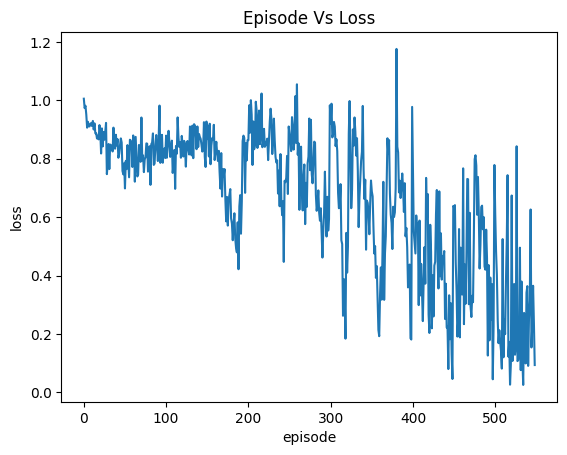

In [ ]:
# Plotting epsilon vs loss
plt.plot(loss_val)
plt.xlabel('episode')
plt.ylabel('loss')
plt.title('Episode Vs Loss')
plt.show()

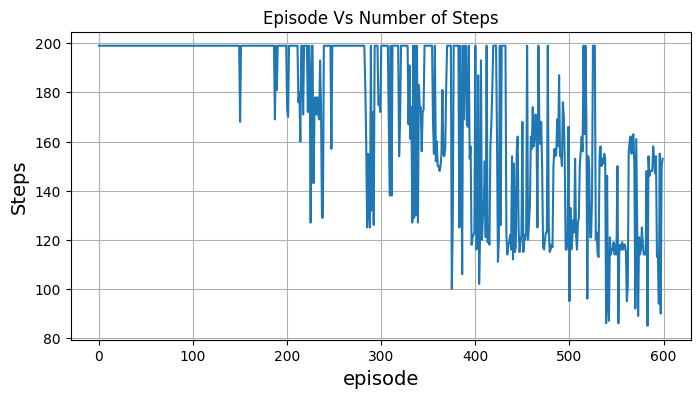

In [ ]:
#plotting epsilon vs steps
plt.figure(figsize=(8, 4))
plt.plot(step_val)
plt.xlabel("episode", fontsize=14)
plt.ylabel("Steps", fontsize=14)
plt.title('Episode Vs Number of Steps')
plt.grid(True)
plt.show()

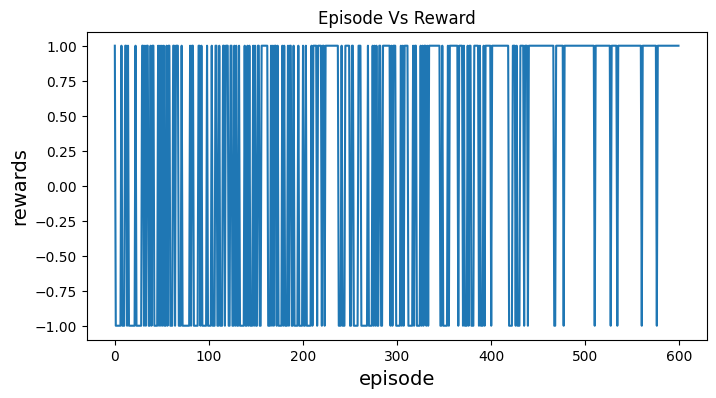

In [ ]:
#plotting epsilon vs reward
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("episode", fontsize=14)
plt.ylabel("rewards", fontsize=14)
plt.title('Episode Vs Reward')
plt.show()

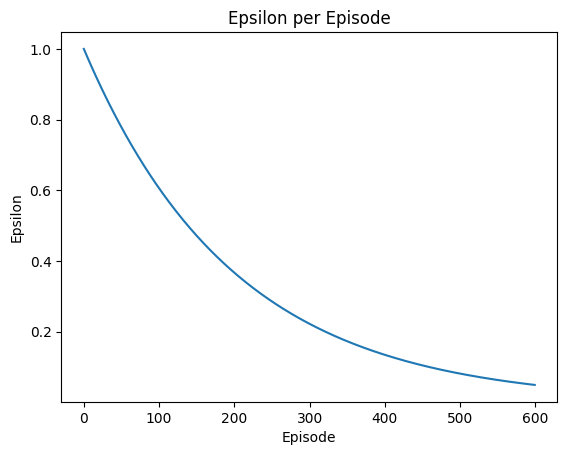

In [ ]:
# Plot epsilon over episodes

plt.plot(epsilon_val)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon per Episode')
plt.show()

# **Double DQN**

#Testing with other parameters

In [39]:

# Initialize an empty list to track the rewards obtained at each episode or step
rewards = []
# Set an initial value for the best score, which might represent the lowest number of steps to reach a goal,
# or the highest reward obtained in a single episode, depending on the context of the environment.
best_score = 199
# Initialize epsilon at 1.0. This is the probability of choosing a random action,
# facilitating exploration of the action space at the start of training.
epsilon = 1
epsilon_min = .01
epsilon_decay = .995
# Initialize lists to store values for loss, epsilon, and steps per episode for monitoring the training progress.
loss_val =[]
epsilon_val =[]
step_val = []
# Create a list to record the history of actions taken, useful for analysis and debugging of the agent's behavior.
action_history = []

from collections import deque

# Create a deque to act as the replay buffer, with a maximum length of 2000.
replay_buffer = deque(maxlen=2000)

In [40]:
batch_size = 64
discount_factor = 0.95
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.mean_squared_error
loss_val =[]

def training_step(batch_size):
    """
    Executes one training step for a deep Q-learning model, using a double DQN update.

    Args:
    batch_size (int): Number of experiences to sample from the replay buffer for this training step.
    """
    # Sample experiences from the replay buffer. Each experience includes states, actions, rewards, next_states, and done signals.
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    # Predict the Q-values for the next states using the main model. Use these predictions to select the best next actions.
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    # Create a mask for filtering out the best next actions' Q-values using the target model's prediction.
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    runs = 1.0 - (dones)
    target_Q_values = rewards + (runs * discount_factor * next_best_Q_values)
    # Calculate the target Q-values for the learning update:

    target_Q_values = target_Q_values.reshape(-1, 1)
    # Create a mask for the actions taken, to filter out the corresponding Q-values from the predictions.
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        # Extract the Q-values of the executed actions.
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        # Compute the loss as the mean squared error between the predicted Q-values and the target Q-values.
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
        print("Loss value : ",loss)
        # Store the loss value for monitoring.
        loss_val.append(loss)
    # Compute the gradients of the loss with respect to the model's trainable variables.
    grads = tape.gradient(loss, model.trainable_variables)
    # Apply the computed gradients to the model's variables.
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
# Set the number of episodes to run the training for.
episodes=500

for episode in range(episodes):
    obs = env.reset()
    print("\n obs :::: ",obs)
    # Execute steps within the episode until a terminal state is reached or the step limit is exceeded.
    for step in range(200):
      # Adjust epsilon dynamically based on the progress through the episodes to balance exploration and exploitation.
        epsilon = max(1 - episode/(episodes*0.8), 0.01)
        # Perform one step in the environment using the current state and epsilon. Collect the new state and other details.
        obs, reward, done, info  = play_one_step(env,obs, epsilon)
        # If a terminal state is reached, exit the loop for the current episode.
        if done:
            break
    # Append the current epsilon value to its tracking list
    epsilon_val.append(epsilon)
    # Update output to show the progress.
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",end="")
    # Keep track of the last reward and the number of steps taken in this episode.
    rewards.append(reward)
    step_val.append(step)

    # if epsilon > epsilon_min:
    #   epsilon *= epsilon_decay
    # Update the target network weights every 50 episodes to the current model weights.
    if episode % 50 == 0:
      target.set_weights(model.get_weights())
    # If the current number of steps is less than or equal to the best score, update the best score and best weights.
    if step <= best_score:
        best_weights = model.get_weights()
        best_score = step

    print("\rEpisode: {}, Best Score: {}, eps: {:.3f}".format(episode, best_score, epsilon), end="")
    # Start training the model using batches from the replay buffer once enough episodes have passed.
    if episode > 50:
        training_step(batch_size)
        print("\rEpisode: {}, Best Score: {}, eps: {:.3f}".format(episode, best_score, epsilon), end="")
# After all episodes are complete, set the model's weights to the best observed weights.
model.set_weights(best_weights)

ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder faile


 obs ::::  [-0.5743773  0.       ]


ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder failed: None
ERROR: VideoRecorder encoder faile

Episode: 0, Best Score: 199, eps: 1.000
 obs ::::  [-0.5099228  0.       ]
Episode: 1, Best Score: 199, eps: 0.998
 obs ::::  [-0.5258404  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 2, Best Score: 199, eps: 0.995
 obs ::::  [-0.414647  0.      ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 3, Best Score: 199, eps: 0.993
 obs ::::  [-0.471227  0.      ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 4, Best Score: 199, eps: 0.990
 obs ::::  [-0.43544766  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 5, Best Score: 199, eps: 0.988

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51131713  0.        ]
Episode: 6, Best Score: 199, eps: 0.985
 obs ::::  [-0.55455226  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 7, Best Score: 199, eps: 0.983
 obs ::::  [-0.48908305  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 8, Best Score: 199, eps: 0.980
 obs ::::  [-0.5872365  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 9, Best Score: 199, eps: 0.978
 obs ::::  [-0.43447375  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 10, Best Score: 199, eps: 0.975
 obs ::::  [-0.47366711  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 11, Best Score: 199, eps: 0.973

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44838244  0.        ]
Episode: 12, Best Score: 199, eps: 0.970
 obs ::::  [-0.5290948  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 13, Best Score: 199, eps: 0.968
 obs ::::  [-0.4058604  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 14, Best Score: 199, eps: 0.965
 obs ::::  [-0.42137578  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 15, Best Score: 199, eps: 0.963
 obs ::::  [-0.4443233  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 16, Best Score: 199, eps: 0.960
 obs ::::  [-0.56107223  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 17, Best Score: 199, eps: 0.958

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5066558  0.       ]
Episode: 18, Best Score: 199, eps: 0.955
 obs ::::  [-0.5912393  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 19, Best Score: 199, eps: 0.953
 obs ::::  [-0.5691421  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 20, Best Score: 199, eps: 0.950
 obs ::::  [-0.4633902  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 21, Best Score: 199, eps: 0.948

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45104757  0.        ]
Episode: 22, Best Score: 199, eps: 0.945

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40649804  0.        ]
Episode: 23, Best Score: 199, eps: 0.943
 obs ::::  [-0.5348349  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 24, Best Score: 199, eps: 0.940
 obs ::::  [-0.52590805  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 25, Best Score: 199, eps: 0.938
 obs ::::  [-0.50608885  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 26, Best Score: 199, eps: 0.935
 obs ::::  [-0.5621057  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 27, Best Score: 199, eps: 0.932

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5740157  0.       ]
Episode: 28, Best Score: 199, eps: 0.930

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50485903  0.        ]
Episode: 29, Best Score: 199, eps: 0.927
 obs ::::  [-0.5546181  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 30, Best Score: 199, eps: 0.925
 obs ::::  [-0.4660372  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 31, Best Score: 199, eps: 0.922

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5125696  0.       ]
Episode: 32, Best Score: 199, eps: 0.920

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43346435  0.        ]
Episode: 33, Best Score: 199, eps: 0.917
 obs ::::  [-0.459947  0.      ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 34, Best Score: 199, eps: 0.915
 obs ::::  [-0.53752667  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 35, Best Score: 199, eps: 0.912
 obs ::::  [-0.43354803  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 36, Best Score: 199, eps: 0.910
 obs ::::  [-0.43904713  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 37, Best Score: 199, eps: 0.907
 obs ::::  [-0.5225043  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 38, Best Score: 199, eps: 0.905
 obs ::::  [-0.5423344  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 39, Best Score: 199, eps: 0.902
 obs ::::  [-0.4635009  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 40, Best Score: 199, eps: 0.900
 obs ::::  [-0.5720495  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 41, Best Score: 199, eps: 0.897
 obs ::::  [-0.56001836  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 42, Best Score: 199, eps: 0.895
 obs ::::  [-0.59852755  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 43, Best Score: 199, eps: 0.892

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44261512  0.        ]
Episode: 44, Best Score: 199, eps: 0.890
 obs ::::  [-0.46702984  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 45, Best Score: 199, eps: 0.887
 obs ::::  [-0.4589669  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 46, Best Score: 199, eps: 0.885
 obs ::::  [-0.44385418  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 47, Best Score: 199, eps: 0.883

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50821686  0.        ]
Episode: 48, Best Score: 199, eps: 0.880
 obs ::::  [-0.48625177  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 49, Best Score: 199, eps: 0.877
 obs ::::  [-0.5720406  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Episode: 50, Best Score: 199, eps: 0.875
 obs ::::  [-0.57709396  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.96579885, shape=(), dtype=float32)
Episode: 51, Best Score: 199, eps: 0.873
 obs ::::  [-0.4663194  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9389467, shape=(), dtype=float32)
Episode: 52, Best Score: 199, eps: 0.870

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50578076  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.93623585, shape=(), dtype=float32)
Episode: 53, Best Score: 199, eps: 0.867

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48695278  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9553771, shape=(), dtype=float32)
Episode: 54, Best Score: 199, eps: 0.865

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44700024  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9390893, shape=(), dtype=float32)
Episode: 55, Best Score: 199, eps: 0.863

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47305635  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9409489, shape=(), dtype=float32)
Episode: 56, Best Score: 199, eps: 0.860
 obs ::::  [-0.48928413  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9202427, shape=(), dtype=float32)
Episode: 57, Best Score: 199, eps: 0.858

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48815855  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.936936, shape=(), dtype=float32)
Episode: 58, Best Score: 199, eps: 0.855

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53920996  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.88331515, shape=(), dtype=float32)
Episode: 59, Best Score: 199, eps: 0.853
 obs ::::  [-0.5938364  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.8626996, shape=(), dtype=float32)
Episode: 60, Best Score: 199, eps: 0.850

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5126565  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8672732, shape=(), dtype=float32)
Episode: 61, Best Score: 199, eps: 0.848
 obs ::::  [-0.5570831  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.857475, shape=(), dtype=float32)
Episode: 62, Best Score: 199, eps: 0.845
 obs ::::  [-0.5182943  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 8ms/step
Loss value :  tf.Tensor(0.8920504, shape=(), dtype=float32)
Episode: 63, Best Score: 199, eps: 0.843

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42931938  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8601583, shape=(), dtype=float32)
Episode: 64, Best Score: 199, eps: 0.840

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5532121  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8046262, shape=(), dtype=float32)
Episode: 65, Best Score: 199, eps: 0.838

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58833945  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.83534735, shape=(), dtype=float32)
Episode: 66, Best Score: 199, eps: 0.835

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5437232  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.86490405, shape=(), dtype=float32)
Episode: 67, Best Score: 199, eps: 0.833
 obs ::::  [-0.5412812  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.85190606, shape=(), dtype=float32)
Episode: 68, Best Score: 199, eps: 0.830

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4676167  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7537026, shape=(), dtype=float32)
Episode: 69, Best Score: 199, eps: 0.828

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48859358  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.77167374, shape=(), dtype=float32)
Episode: 70, Best Score: 199, eps: 0.825

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44322035  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8352965, shape=(), dtype=float32)
Episode: 71, Best Score: 199, eps: 0.823

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46713728  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8050767, shape=(), dtype=float32)
Episode: 72, Best Score: 199, eps: 0.820

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51872265  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.79988974, shape=(), dtype=float32)
Episode: 73, Best Score: 199, eps: 0.818

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43719593  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7948103, shape=(), dtype=float32)
Episode: 74, Best Score: 199, eps: 0.815
 obs ::::  [-0.5666054  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.72418696, shape=(), dtype=float32)
Episode: 75, Best Score: 199, eps: 0.812
 obs ::::  [-0.5954576  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.78064495, shape=(), dtype=float32)
Episode: 76, Best Score: 199, eps: 0.810

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5819904  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7766937, shape=(), dtype=float32)
Episode: 77, Best Score: 199, eps: 0.807
 obs ::::  [-0.45552814  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7045538, shape=(), dtype=float32)
Episode: 78, Best Score: 199, eps: 0.805
 obs ::::  [-0.50762457  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.776508, shape=(), dtype=float32)
Episode: 79, Best Score: 199, eps: 0.802

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5677456  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.67789304, shape=(), dtype=float32)
Episode: 80, Best Score: 199, eps: 0.800

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49979106  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.62739086, shape=(), dtype=float32)
Episode: 81, Best Score: 199, eps: 0.797

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5695376  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7594896, shape=(), dtype=float32)
Episode: 82, Best Score: 199, eps: 0.795

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46073592  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.80503786, shape=(), dtype=float32)
Episode: 83, Best Score: 199, eps: 0.792

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5107688  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.66755855, shape=(), dtype=float32)
Episode: 84, Best Score: 199, eps: 0.790

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5237958  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.66355723, shape=(), dtype=float32)
Episode: 85, Best Score: 199, eps: 0.787
 obs ::::  [-0.5396976  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.67926365, shape=(), dtype=float32)
Episode: 86, Best Score: 199, eps: 0.785
 obs ::::  [-0.47394347  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.71263707, shape=(), dtype=float32)
Episode: 87, Best Score: 199, eps: 0.782

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5276375  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7249203, shape=(), dtype=float32)
Episode: 88, Best Score: 199, eps: 0.780

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58247  0.     ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.79269236, shape=(), dtype=float32)
Episode: 89, Best Score: 199, eps: 0.777

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5763988  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7236326, shape=(), dtype=float32)
Episode: 90, Best Score: 199, eps: 0.775

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40762046  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.65021837, shape=(), dtype=float32)
Episode: 91, Best Score: 199, eps: 0.772

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41828385  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6913421, shape=(), dtype=float32)
Episode: 92, Best Score: 199, eps: 0.770
 obs ::::  [-0.46005857  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6131752, shape=(), dtype=float32)
Episode: 93, Best Score: 199, eps: 0.767

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.546826  0.      ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7334417, shape=(), dtype=float32)
Episode: 94, Best Score: 199, eps: 0.765

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40616474  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.6998902, shape=(), dtype=float32)
Episode: 95, Best Score: 199, eps: 0.762

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4442498  0.       ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.73489535, shape=(), dtype=float32)
Episode: 96, Best Score: 199, eps: 0.760

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45662197  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.85857713, shape=(), dtype=float32)
Episode: 97, Best Score: 199, eps: 0.758
 obs ::::  [-0.5101277  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.62530893, shape=(), dtype=float32)
Episode: 98, Best Score: 199, eps: 0.755

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5455517  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.72819096, shape=(), dtype=float32)
Episode: 99, Best Score: 199, eps: 0.752
 obs ::::  [-0.5807218  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.71498865, shape=(), dtype=float32)
Episode: 100, Best Score: 199, eps: 0.750

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41947952  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.73286116, shape=(), dtype=float32)
Episode: 101, Best Score: 199, eps: 0.748

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50884473  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.75879073, shape=(), dtype=float32)
Episode: 102, Best Score: 199, eps: 0.745

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55952734  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.76444995, shape=(), dtype=float32)
Episode: 103, Best Score: 199, eps: 0.742
 obs ::::  [-0.5388087  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7450939, shape=(), dtype=float32)
Episode: 104, Best Score: 199, eps: 0.740

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48415607  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7458097, shape=(), dtype=float32)
Episode: 105, Best Score: 199, eps: 0.738
 obs ::::  [-0.56464547  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8147278, shape=(), dtype=float32)
Episode: 106, Best Score: 199, eps: 0.735
 obs ::::  [-0.42867714  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7769919, shape=(), dtype=float32)
Episode: 107, Best Score: 199, eps: 0.732

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4482961  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.75471896, shape=(), dtype=float32)
Episode: 108, Best Score: 199, eps: 0.730

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4561074  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7740005, shape=(), dtype=float32)
Episode: 109, Best Score: 199, eps: 0.728

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5135814  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.71437466, shape=(), dtype=float32)
Episode: 110, Best Score: 199, eps: 0.725

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47453824  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8071275, shape=(), dtype=float32)
Episode: 111, Best Score: 199, eps: 0.722

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4831804  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.83145595, shape=(), dtype=float32)
Episode: 112, Best Score: 199, eps: 0.720

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47003067  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.77591443, shape=(), dtype=float32)
Episode: 113, Best Score: 199, eps: 0.718

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5831111  0.       ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.69030017, shape=(), dtype=float32)
Episode: 114, Best Score: 199, eps: 0.715

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5168385  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.69679666, shape=(), dtype=float32)
Episode: 115, Best Score: 199, eps: 0.713
 obs ::::  [-0.5916772  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7661482, shape=(), dtype=float32)
Episode: 116, Best Score: 199, eps: 0.710

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5012018  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7419525, shape=(), dtype=float32)
Episode: 117, Best Score: 199, eps: 0.708

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53402776  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.7594098, shape=(), dtype=float32)
Episode: 118, Best Score: 199, eps: 0.705

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57109517  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.68387544, shape=(), dtype=float32)
Episode: 119, Best Score: 199, eps: 0.703

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5793194  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8138341, shape=(), dtype=float32)
Episode: 120, Best Score: 199, eps: 0.700

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48247108  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7688503, shape=(), dtype=float32)
Episode: 121, Best Score: 199, eps: 0.698

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56588143  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.73927647, shape=(), dtype=float32)
Episode: 122, Best Score: 199, eps: 0.695
 obs ::::  [-0.41497597  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.78231514, shape=(), dtype=float32)
Episode: 123, Best Score: 199, eps: 0.693

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48378778  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.83588254, shape=(), dtype=float32)
Episode: 124, Best Score: 199, eps: 0.690

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53062606  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7849066, shape=(), dtype=float32)
Episode: 125, Best Score: 199, eps: 0.688

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4818169  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8079182, shape=(), dtype=float32)
Episode: 126, Best Score: 199, eps: 0.685

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59543926  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.78493905, shape=(), dtype=float32)
Episode: 127, Best Score: 199, eps: 0.682
 obs ::::  [-0.40828815  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7910514, shape=(), dtype=float32)
Episode: 128, Best Score: 199, eps: 0.680
 obs ::::  [-0.5035393  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7153845, shape=(), dtype=float32)
Episode: 129, Best Score: 199, eps: 0.677

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44345295  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.836571, shape=(), dtype=float32)
Episode: 130, Best Score: 199, eps: 0.675

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.583454  0.      ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.777194, shape=(), dtype=float32)
Episode: 131, Best Score: 199, eps: 0.672

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5026683  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.73445916, shape=(), dtype=float32)
Episode: 132, Best Score: 199, eps: 0.670

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5018586  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7337008, shape=(), dtype=float32)
Episode: 133, Best Score: 199, eps: 0.667

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4124347  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.74578655, shape=(), dtype=float32)
Episode: 134, Best Score: 199, eps: 0.665

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48565438  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.73309267, shape=(), dtype=float32)
Episode: 135, Best Score: 199, eps: 0.662
 obs ::::  [-0.50530213  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.6954267, shape=(), dtype=float32)
Episode: 136, Best Score: 199, eps: 0.660

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5466049  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.69363904, shape=(), dtype=float32)
Episode: 137, Best Score: 199, eps: 0.657

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5336862  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7580602, shape=(), dtype=float32)
Episode: 138, Best Score: 199, eps: 0.655

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49586552  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6878406, shape=(), dtype=float32)
Episode: 139, Best Score: 199, eps: 0.653

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5122177  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.67002577, shape=(), dtype=float32)
Episode: 140, Best Score: 199, eps: 0.650

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59567755  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.62803537, shape=(), dtype=float32)
Episode: 141, Best Score: 199, eps: 0.647
 obs ::::  [-0.43474162  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.67755926, shape=(), dtype=float32)
Episode: 142, Best Score: 199, eps: 0.645

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42076784  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7749866, shape=(), dtype=float32)
Episode: 143, Best Score: 199, eps: 0.643

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5719502  0.       ]
2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.8301731, shape=(), dtype=float32)
Episode: 144, Best Score: 199, eps: 0.640

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48919278  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8066455, shape=(), dtype=float32)
Episode: 145, Best Score: 199, eps: 0.637
 obs ::::  [-0.57828486  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6465647, shape=(), dtype=float32)
Episode: 146, Best Score: 199, eps: 0.635
 obs ::::  [-0.46555197  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.78437924, shape=(), dtype=float32)
Episode: 147, Best Score: 199, eps: 0.633

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54375327  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6689235, shape=(), dtype=float32)
Episode: 148, Best Score: 199, eps: 0.630

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46811548  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7658564, shape=(), dtype=float32)
Episode: 149, Best Score: 199, eps: 0.627
 obs ::::  [-0.45460108  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7821338, shape=(), dtype=float32)
Episode: 150, Best Score: 199, eps: 0.625

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4462705  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7827425, shape=(), dtype=float32)
Episode: 151, Best Score: 199, eps: 0.623

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5784518  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.75808215, shape=(), dtype=float32)
Episode: 152, Best Score: 199, eps: 0.620

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41679764  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8574456, shape=(), dtype=float32)
Episode: 153, Best Score: 199, eps: 0.617

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5539572  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.75859636, shape=(), dtype=float32)
Episode: 154, Best Score: 199, eps: 0.615

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5925175  0.       ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.83594406, shape=(), dtype=float32)
Episode: 155, Best Score: 199, eps: 0.613
 obs ::::  [-0.4890295  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7521795, shape=(), dtype=float32)
Episode: 156, Best Score: 199, eps: 0.610

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52581555  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7369453, shape=(), dtype=float32)
Episode: 157, Best Score: 199, eps: 0.607

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43404204  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8354832, shape=(), dtype=float32)
Episode: 158, Best Score: 199, eps: 0.605

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4383497  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.80370265, shape=(), dtype=float32)
Episode: 159, Best Score: 199, eps: 0.603

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5365722  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.83797204, shape=(), dtype=float32)
Episode: 160, Best Score: 199, eps: 0.600

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40942013  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.87074935, shape=(), dtype=float32)
Episode: 161, Best Score: 199, eps: 0.597
 obs ::::  [-0.5418164  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.8355416, shape=(), dtype=float32)
Episode: 162, Best Score: 199, eps: 0.595

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49698856  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7718995, shape=(), dtype=float32)
Episode: 163, Best Score: 199, eps: 0.593

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54880697  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.80047274, shape=(), dtype=float32)
Episode: 164, Best Score: 199, eps: 0.590

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41279128  0.        ]
2/2 [==============================] - 0s 8ms/step
Loss value :  tf.Tensor(0.79769397, shape=(), dtype=float32)
Episode: 165, Best Score: 199, eps: 0.588

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5670784  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.90301096, shape=(), dtype=float32)
Episode: 166, Best Score: 199, eps: 0.585

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5910179  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.75107706, shape=(), dtype=float32)
Episode: 167, Best Score: 199, eps: 0.583

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5129806  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.78240347, shape=(), dtype=float32)
Episode: 168, Best Score: 199, eps: 0.580
 obs ::::  [-0.4015249  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.80224997, shape=(), dtype=float32)
Episode: 169, Best Score: 199, eps: 0.578

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42166454  0.        ]
2/2 [==============================] - 0s 8ms/step
Loss value :  tf.Tensor(0.79364884, shape=(), dtype=float32)
Episode: 170, Best Score: 199, eps: 0.575

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4502784  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.86425906, shape=(), dtype=float32)
Episode: 171, Best Score: 199, eps: 0.573

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4218415  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.84184253, shape=(), dtype=float32)
Episode: 172, Best Score: 199, eps: 0.570
 obs ::::  [-0.42131066  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8028511, shape=(), dtype=float32)
Episode: 173, Best Score: 199, eps: 0.568

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49622834  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.81916577, shape=(), dtype=float32)
Episode: 174, Best Score: 199, eps: 0.565

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5368142  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9222221, shape=(), dtype=float32)
Episode: 175, Best Score: 199, eps: 0.562
 obs ::::  [-0.4455975  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.88388604, shape=(), dtype=float32)
Episode: 176, Best Score: 199, eps: 0.560
 obs ::::  [-0.46766776  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.85338986, shape=(), dtype=float32)
Episode: 177, Best Score: 199, eps: 0.557

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52526844  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.77143514, shape=(), dtype=float32)
Episode: 178, Best Score: 199, eps: 0.555

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58110666  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8181509, shape=(), dtype=float32)
Episode: 179, Best Score: 199, eps: 0.552

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45064208  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7973306, shape=(), dtype=float32)
Episode: 180, Best Score: 199, eps: 0.550

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5475079  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6217928, shape=(), dtype=float32)
Episode: 181, Best Score: 199, eps: 0.547

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41263738  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.68960464, shape=(), dtype=float32)
Episode: 182, Best Score: 199, eps: 0.545

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5518059  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7312467, shape=(), dtype=float32)
Episode: 183, Best Score: 199, eps: 0.542

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5754484  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8322364, shape=(), dtype=float32)
Episode: 184, Best Score: 199, eps: 0.540

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43377745  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.7542108, shape=(), dtype=float32)
Episode: 185, Best Score: 199, eps: 0.537

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56934315  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.75073767, shape=(), dtype=float32)
Episode: 186, Best Score: 199, eps: 0.535

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56414634  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7934675, shape=(), dtype=float32)
Episode: 187, Best Score: 199, eps: 0.532

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48012343  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.87781787, shape=(), dtype=float32)
Episode: 188, Best Score: 199, eps: 0.530

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4250876  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.76853865, shape=(), dtype=float32)
Episode: 189, Best Score: 199, eps: 0.528

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56071305  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.834095, shape=(), dtype=float32)
Episode: 190, Best Score: 199, eps: 0.525

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53793526  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.80472267, shape=(), dtype=float32)
Episode: 191, Best Score: 199, eps: 0.522
 obs ::::  [-0.44451904  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8581682, shape=(), dtype=float32)
Episode: 192, Best Score: 199, eps: 0.520

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4056347  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.83092546, shape=(), dtype=float32)
Episode: 193, Best Score: 199, eps: 0.518

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49985176  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8333212, shape=(), dtype=float32)
Episode: 194, Best Score: 199, eps: 0.515
 obs ::::  [-0.5712205  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.865579, shape=(), dtype=float32)
Episode: 195, Best Score: 199, eps: 0.512

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59721273  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.84822845, shape=(), dtype=float32)
Episode: 196, Best Score: 199, eps: 0.510
 obs ::::  [-0.5540688  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.89847237, shape=(), dtype=float32)
Episode: 197, Best Score: 199, eps: 0.508

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5736356  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7222094, shape=(), dtype=float32)
Episode: 198, Best Score: 199, eps: 0.505

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46446827  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7653036, shape=(), dtype=float32)
Episode: 199, Best Score: 199, eps: 0.502

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5756335  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7347696, shape=(), dtype=float32)
Episode: 200, Best Score: 199, eps: 0.500

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49873403  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.75731456, shape=(), dtype=float32)
Episode: 201, Best Score: 199, eps: 0.498
 obs ::::  [-0.46114752  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8128132, shape=(), dtype=float32)
Episode: 202, Best Score: 199, eps: 0.495

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4837767  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8048155, shape=(), dtype=float32)
Episode: 203, Best Score: 199, eps: 0.493

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5600449  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7491747, shape=(), dtype=float32)
Episode: 204, Best Score: 199, eps: 0.490

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4391751  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7290002, shape=(), dtype=float32)
Episode: 205, Best Score: 199, eps: 0.488

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45691857  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7958751, shape=(), dtype=float32)
Episode: 206, Best Score: 199, eps: 0.485

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45220318  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.88178515, shape=(), dtype=float32)
Episode: 207, Best Score: 199, eps: 0.483

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57378846  0.        ]
2/2 [==============================] - 0s 11ms/step
Loss value :  tf.Tensor(0.79649127, shape=(), dtype=float32)
Episode: 208, Best Score: 199, eps: 0.480

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57524925  0.        ]
2/2 [==============================] - 0s 10ms/step
Loss value :  tf.Tensor(0.80911887, shape=(), dtype=float32)
Episode: 209, Best Score: 199, eps: 0.478

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41448748  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7465195, shape=(), dtype=float32)
Episode: 210, Best Score: 199, eps: 0.475

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5204844  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9570854, shape=(), dtype=float32)
Episode: 211, Best Score: 199, eps: 0.473

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53981024  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7876073, shape=(), dtype=float32)
Episode: 212, Best Score: 199, eps: 0.470
 obs ::::  [-0.5022832  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.82630694, shape=(), dtype=float32)
Episode: 213, Best Score: 199, eps: 0.468

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46742716  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7074066, shape=(), dtype=float32)
Episode: 214, Best Score: 199, eps: 0.465
 obs ::::  [-0.40887535  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8333423, shape=(), dtype=float32)
Episode: 215, Best Score: 199, eps: 0.463

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5427108  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8019546, shape=(), dtype=float32)
Episode: 216, Best Score: 199, eps: 0.460

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41503832  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8159737, shape=(), dtype=float32)
Episode: 217, Best Score: 199, eps: 0.458

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5950281  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7572206, shape=(), dtype=float32)
Episode: 218, Best Score: 199, eps: 0.455
 obs ::::  [-0.4889604  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.8901776, shape=(), dtype=float32)
Episode: 219, Best Score: 199, eps: 0.453

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47320497  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8691254, shape=(), dtype=float32)
Episode: 220, Best Score: 199, eps: 0.450

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5788205  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.93644994, shape=(), dtype=float32)
Episode: 221, Best Score: 199, eps: 0.448

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5719321  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8572241, shape=(), dtype=float32)
Episode: 222, Best Score: 199, eps: 0.445

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5161771  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.63898444, shape=(), dtype=float32)
Episode: 223, Best Score: 199, eps: 0.443

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40675363  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.83685786, shape=(), dtype=float32)
Episode: 224, Best Score: 199, eps: 0.440

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48079148  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8245633, shape=(), dtype=float32)
Episode: 225, Best Score: 199, eps: 0.438

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41339535  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.84670997, shape=(), dtype=float32)
Episode: 226, Best Score: 199, eps: 0.435

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4391278  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8357055, shape=(), dtype=float32)
Episode: 227, Best Score: 199, eps: 0.432

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50652367  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.89891183, shape=(), dtype=float32)
Episode: 228, Best Score: 199, eps: 0.430
 obs ::::  [-0.4430473  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.858062, shape=(), dtype=float32)
Episode: 229, Best Score: 199, eps: 0.427

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5964326  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.85000074, shape=(), dtype=float32)
Episode: 230, Best Score: 199, eps: 0.425
 obs ::::  [-0.5781712  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.9312751, shape=(), dtype=float32)
Episode: 231, Best Score: 199, eps: 0.422

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43411428  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9163407, shape=(), dtype=float32)
Episode: 232, Best Score: 199, eps: 0.420

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44063658  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7700616, shape=(), dtype=float32)
Episode: 233, Best Score: 199, eps: 0.417

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55347186  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.8021914, shape=(), dtype=float32)
Episode: 234, Best Score: 199, eps: 0.415

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4938461  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.82837296, shape=(), dtype=float32)
Episode: 235, Best Score: 199, eps: 0.412

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47879684  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.82624817, shape=(), dtype=float32)
Episode: 236, Best Score: 199, eps: 0.410

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42645222  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.7915919, shape=(), dtype=float32)
Episode: 237, Best Score: 199, eps: 0.407

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47937858  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9232807, shape=(), dtype=float32)
Episode: 238, Best Score: 199, eps: 0.405

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5174857  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.85993606, shape=(), dtype=float32)
Episode: 239, Best Score: 199, eps: 0.402

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5251632  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8626969, shape=(), dtype=float32)
Episode: 240, Best Score: 199, eps: 0.400

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51482356  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.86204064, shape=(), dtype=float32)
Episode: 241, Best Score: 199, eps: 0.397

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4696138  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.9115216, shape=(), dtype=float32)
Episode: 242, Best Score: 199, eps: 0.395

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42650187  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.8565396, shape=(), dtype=float32)
Episode: 243, Best Score: 199, eps: 0.392

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5092206  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.84024745, shape=(), dtype=float32)
Episode: 244, Best Score: 199, eps: 0.390

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5504321  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.77668583, shape=(), dtype=float32)
Episode: 245, Best Score: 199, eps: 0.387

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5526675  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.79984504, shape=(), dtype=float32)
Episode: 246, Best Score: 199, eps: 0.385

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45079714  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.866335, shape=(), dtype=float32)
Episode: 247, Best Score: 199, eps: 0.382

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43668625  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.81539744, shape=(), dtype=float32)
Episode: 248, Best Score: 199, eps: 0.380

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5789444  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8857541, shape=(), dtype=float32)
Episode: 249, Best Score: 199, eps: 0.377

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5866882  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8446975, shape=(), dtype=float32)
Episode: 250, Best Score: 199, eps: 0.375

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48111326  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9027462, shape=(), dtype=float32)
Episode: 251, Best Score: 199, eps: 0.373

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5707654  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.91198033, shape=(), dtype=float32)
Episode: 252, Best Score: 199, eps: 0.370

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43506715  0.        ]
2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.9022813, shape=(), dtype=float32)
Episode: 253, Best Score: 199, eps: 0.368

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53793305  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8497787, shape=(), dtype=float32)
Episode: 254, Best Score: 199, eps: 0.365

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57122564  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8388795, shape=(), dtype=float32)
Episode: 255, Best Score: 199, eps: 0.363

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4158059  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.91234624, shape=(), dtype=float32)
Episode: 256, Best Score: 199, eps: 0.360

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56689364  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.94549894, shape=(), dtype=float32)
Episode: 257, Best Score: 199, eps: 0.358

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.543056  0.      ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8481864, shape=(), dtype=float32)
Episode: 258, Best Score: 199, eps: 0.355

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56927735  0.        ]
2/2 [==============================] - 0s 8ms/step
Loss value :  tf.Tensor(0.8838053, shape=(), dtype=float32)
Episode: 259, Best Score: 199, eps: 0.353

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.576902  0.      ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.90533173, shape=(), dtype=float32)
Episode: 260, Best Score: 199, eps: 0.350

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5957704  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9485439, shape=(), dtype=float32)
Episode: 261, Best Score: 199, eps: 0.348

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5889209  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.77819645, shape=(), dtype=float32)
Episode: 262, Best Score: 199, eps: 0.345

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5650717  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.90855557, shape=(), dtype=float32)
Episode: 263, Best Score: 199, eps: 0.343

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58932364  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.915661, shape=(), dtype=float32)
Episode: 264, Best Score: 199, eps: 0.340

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48177123  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.937826, shape=(), dtype=float32)
Episode: 265, Best Score: 199, eps: 0.338

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46385708  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.85907376, shape=(), dtype=float32)
Episode: 266, Best Score: 199, eps: 0.335

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5212739  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8722659, shape=(), dtype=float32)
Episode: 267, Best Score: 199, eps: 0.333

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5364018  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7853272, shape=(), dtype=float32)
Episode: 268, Best Score: 199, eps: 0.330

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49909475  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.93819803, shape=(), dtype=float32)
Episode: 269, Best Score: 199, eps: 0.328

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.424999  0.      ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9144306, shape=(), dtype=float32)
Episode: 270, Best Score: 199, eps: 0.325

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4297737  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9200252, shape=(), dtype=float32)
Episode: 271, Best Score: 199, eps: 0.323

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59130496  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7832211, shape=(), dtype=float32)
Episode: 272, Best Score: 199, eps: 0.320

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5637003  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8861201, shape=(), dtype=float32)
Episode: 273, Best Score: 199, eps: 0.318

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55265105  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.883479, shape=(), dtype=float32)
Episode: 274, Best Score: 199, eps: 0.315

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5501225  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.92313063, shape=(), dtype=float32)
Episode: 275, Best Score: 199, eps: 0.312

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48575348  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.933547, shape=(), dtype=float32)
Episode: 276, Best Score: 199, eps: 0.310

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51674753  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9279933, shape=(), dtype=float32)
Episode: 277, Best Score: 173, eps: 0.307

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.59014916  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8653382, shape=(), dtype=float32)
Episode: 278, Best Score: 173, eps: 0.305

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5252772  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8895247, shape=(), dtype=float32)
Episode: 279, Best Score: 173, eps: 0.302

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49524942  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8636993, shape=(), dtype=float32)
Episode: 280, Best Score: 156, eps: 0.300

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5796656  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.81189096, shape=(), dtype=float32)
Episode: 281, Best Score: 156, eps: 0.297

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4333083  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.95755106, shape=(), dtype=float32)
Episode: 282, Best Score: 152, eps: 0.295
 obs ::::  [-0.58960766  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7766272, shape=(), dtype=float32)
Episode: 283, Best Score: 152, eps: 0.292

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4150316  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.84667885, shape=(), dtype=float32)
Episode: 284, Best Score: 152, eps: 0.290

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58017737  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.73437977, shape=(), dtype=float32)
Episode: 285, Best Score: 152, eps: 0.287

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43128502  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7305699, shape=(), dtype=float32)
Episode: 286, Best Score: 152, eps: 0.285

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41946936  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.77962816, shape=(), dtype=float32)
Episode: 287, Best Score: 152, eps: 0.282

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40408587  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7083674, shape=(), dtype=float32)
Episode: 288, Best Score: 152, eps: 0.280

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43959484  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7491391, shape=(), dtype=float32)
Episode: 289, Best Score: 152, eps: 0.277

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4441045  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.677197, shape=(), dtype=float32)
Episode: 290, Best Score: 152, eps: 0.275

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47150335  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.6968275, shape=(), dtype=float32)
Episode: 291, Best Score: 152, eps: 0.272

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44420072  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.86140245, shape=(), dtype=float32)
Episode: 292, Best Score: 152, eps: 0.270
 obs ::::  [-0.57308954  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9758568, shape=(), dtype=float32)
Episode: 293, Best Score: 152, eps: 0.267

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4927864  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.96641636, shape=(), dtype=float32)
Episode: 294, Best Score: 152, eps: 0.265

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49715543  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.826388, shape=(), dtype=float32)
Episode: 295, Best Score: 152, eps: 0.262

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42848557  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8516191, shape=(), dtype=float32)
Episode: 296, Best Score: 152, eps: 0.260

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50744015  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9308281, shape=(), dtype=float32)
Episode: 297, Best Score: 138, eps: 0.257

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5229821  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7141685, shape=(), dtype=float32)
Episode: 298, Best Score: 138, eps: 0.255

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47208735  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8485502, shape=(), dtype=float32)
Episode: 299, Best Score: 138, eps: 0.252

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54670733  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9452579, shape=(), dtype=float32)
Episode: 300, Best Score: 138, eps: 0.250

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57204634  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.90158206, shape=(), dtype=float32)
Episode: 301, Best Score: 138, eps: 0.248

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5044246  0.       ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.8938308, shape=(), dtype=float32)
Episode: 302, Best Score: 138, eps: 0.245

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5166221  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8895304, shape=(), dtype=float32)
Episode: 303, Best Score: 138, eps: 0.243

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.553486  0.      ]
2/2 [==============================] - 0s 8ms/step
Loss value :  tf.Tensor(0.98643374, shape=(), dtype=float32)
Episode: 304, Best Score: 138, eps: 0.240

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52649766  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.920154, shape=(), dtype=float32)
Episode: 305, Best Score: 138, eps: 0.238

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52672154  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.97043896, shape=(), dtype=float32)
Episode: 306, Best Score: 138, eps: 0.235

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5345009  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8715959, shape=(), dtype=float32)
Episode: 307, Best Score: 138, eps: 0.233

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52410716  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9143755, shape=(), dtype=float32)
Episode: 308, Best Score: 138, eps: 0.230

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46285135  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8889475, shape=(), dtype=float32)
Episode: 309, Best Score: 138, eps: 0.228

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5406247  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.96807027, shape=(), dtype=float32)
Episode: 310, Best Score: 138, eps: 0.225

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4102284  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.99975467, shape=(), dtype=float32)
Episode: 311, Best Score: 138, eps: 0.223

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4167304  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.89747834, shape=(), dtype=float32)
Episode: 312, Best Score: 138, eps: 0.220

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5038179  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.87550104, shape=(), dtype=float32)
Episode: 313, Best Score: 138, eps: 0.218

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53432775  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.99417955, shape=(), dtype=float32)
Episode: 314, Best Score: 138, eps: 0.215

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49291304  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.90327823, shape=(), dtype=float32)
Episode: 315, Best Score: 138, eps: 0.213

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4302879  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.88240945, shape=(), dtype=float32)
Episode: 316, Best Score: 138, eps: 0.210

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46948254  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0107207, shape=(), dtype=float32)
Episode: 317, Best Score: 138, eps: 0.208

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43912163  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.94699967, shape=(), dtype=float32)
Episode: 318, Best Score: 138, eps: 0.205

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49345556  0.        ]
2/2 [==============================] - 0s 11ms/step
Loss value :  tf.Tensor(1.0037624, shape=(), dtype=float32)
Episode: 319, Best Score: 138, eps: 0.203

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47341648  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.96638876, shape=(), dtype=float32)
Episode: 320, Best Score: 138, eps: 0.200

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5423689  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.84957385, shape=(), dtype=float32)
Episode: 321, Best Score: 138, eps: 0.198

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45302138  0.        ]
2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.77538764, shape=(), dtype=float32)
Episode: 322, Best Score: 138, eps: 0.195

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55951905  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8881825, shape=(), dtype=float32)
Episode: 323, Best Score: 138, eps: 0.193

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46104038  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8227416, shape=(), dtype=float32)
Episode: 324, Best Score: 138, eps: 0.190

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42785618  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.85689926, shape=(), dtype=float32)
Episode: 325, Best Score: 138, eps: 0.188

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57357943  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8267117, shape=(), dtype=float32)
Episode: 326, Best Score: 138, eps: 0.185

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47712407  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.797135, shape=(), dtype=float32)
Episode: 327, Best Score: 138, eps: 0.182

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58098084  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.7219677, shape=(), dtype=float32)
Episode: 328, Best Score: 138, eps: 0.180

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45485687  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.73460436, shape=(), dtype=float32)
Episode: 329, Best Score: 138, eps: 0.177

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58310133  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.71984535, shape=(), dtype=float32)
Episode: 330, Best Score: 138, eps: 0.175
 obs ::::  [-0.41281202  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.5405501, shape=(), dtype=float32)
Episode: 331, Best Score: 138, eps: 0.172

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5725184  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.6980086, shape=(), dtype=float32)
Episode: 332, Best Score: 125, eps: 0.170

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40822396  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.6971621, shape=(), dtype=float32)
Episode: 333, Best Score: 125, eps: 0.167

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43982315  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.7139605, shape=(), dtype=float32)
Episode: 334, Best Score: 125, eps: 0.165

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4812636  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7005731, shape=(), dtype=float32)
Episode: 335, Best Score: 125, eps: 0.162

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4434752  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.76157725, shape=(), dtype=float32)
Episode: 336, Best Score: 125, eps: 0.160

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44097704  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8543845, shape=(), dtype=float32)
Episode: 337, Best Score: 125, eps: 0.157

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4107946  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.85893047, shape=(), dtype=float32)
Episode: 338, Best Score: 125, eps: 0.155

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5493233  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.83966607, shape=(), dtype=float32)
Episode: 339, Best Score: 125, eps: 0.152

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48198482  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.8575187, shape=(), dtype=float32)
Episode: 340, Best Score: 125, eps: 0.150

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58099014  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.98822415, shape=(), dtype=float32)
Episode: 341, Best Score: 125, eps: 0.147

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47676685  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.1541387, shape=(), dtype=float32)
Episode: 342, Best Score: 117, eps: 0.145

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5657417  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8850802, shape=(), dtype=float32)
Episode: 343, Best Score: 117, eps: 0.142

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48700988  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.2946779, shape=(), dtype=float32)
Episode: 344, Best Score: 117, eps: 0.140

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4855139  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9631271, shape=(), dtype=float32)
Episode: 345, Best Score: 117, eps: 0.137

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.506803  0.      ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.9263435, shape=(), dtype=float32)
Episode: 346, Best Score: 117, eps: 0.135

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49547365  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.2541494, shape=(), dtype=float32)
Episode: 347, Best Score: 117, eps: 0.132

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44721532  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9269293, shape=(), dtype=float32)
Episode: 348, Best Score: 117, eps: 0.130

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44015107  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.8546017, shape=(), dtype=float32)
Episode: 349, Best Score: 117, eps: 0.127

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50156933  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.96771276, shape=(), dtype=float32)
Episode: 350, Best Score: 117, eps: 0.125

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48008132  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9332328, shape=(), dtype=float32)
Episode: 351, Best Score: 117, eps: 0.123

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41375276  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.1986318, shape=(), dtype=float32)
Episode: 352, Best Score: 117, eps: 0.120

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57605326  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.99361646, shape=(), dtype=float32)
Episode: 353, Best Score: 117, eps: 0.118

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5765793  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.1133378, shape=(), dtype=float32)
Episode: 354, Best Score: 117, eps: 0.115

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5824582  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.9957465, shape=(), dtype=float32)
Episode: 355, Best Score: 117, eps: 0.113

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46842733  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9987781, shape=(), dtype=float32)
Episode: 356, Best Score: 117, eps: 0.110

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5162783  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0728977, shape=(), dtype=float32)
Episode: 357, Best Score: 117, eps: 0.108

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4451357  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(1.0095845, shape=(), dtype=float32)
Episode: 358, Best Score: 117, eps: 0.105

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4657537  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.996008, shape=(), dtype=float32)
Episode: 359, Best Score: 117, eps: 0.103

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.53327245  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0321405, shape=(), dtype=float32)
Episode: 360, Best Score: 117, eps: 0.100

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42032668  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0222613, shape=(), dtype=float32)
Episode: 361, Best Score: 117, eps: 0.098

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44749358  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9982102, shape=(), dtype=float32)
Episode: 362, Best Score: 117, eps: 0.095

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.545893  0.      ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.95329106, shape=(), dtype=float32)
Episode: 363, Best Score: 117, eps: 0.093

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5271616  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.95229274, shape=(), dtype=float32)
Episode: 364, Best Score: 117, eps: 0.090

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.537112  0.      ]
2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.92397463, shape=(), dtype=float32)
Episode: 365, Best Score: 117, eps: 0.088

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5684777  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.92118466, shape=(), dtype=float32)
Episode: 366, Best Score: 117, eps: 0.085

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57044333  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.94849914, shape=(), dtype=float32)
Episode: 367, Best Score: 117, eps: 0.083

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4127745  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0603145, shape=(), dtype=float32)
Episode: 368, Best Score: 117, eps: 0.080

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51241916  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.1534431, shape=(), dtype=float32)
Episode: 369, Best Score: 117, eps: 0.078

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.52333605  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.93030226, shape=(), dtype=float32)
Episode: 370, Best Score: 117, eps: 0.075

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45406285  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0408438, shape=(), dtype=float32)
Episode: 371, Best Score: 117, eps: 0.073

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4894014  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.9445653, shape=(), dtype=float32)
Episode: 372, Best Score: 117, eps: 0.070

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.412772  0.      ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.87059295, shape=(), dtype=float32)
Episode: 373, Best Score: 117, eps: 0.068

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44393972  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.0471519, shape=(), dtype=float32)
Episode: 374, Best Score: 117, eps: 0.065

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5041261  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.98431706, shape=(), dtype=float32)
Episode: 375, Best Score: 117, eps: 0.062

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5247281  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.90645814, shape=(), dtype=float32)
Episode: 376, Best Score: 117, eps: 0.060

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4026737  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.93727106, shape=(), dtype=float32)
Episode: 377, Best Score: 117, eps: 0.057

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45644796  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8544149, shape=(), dtype=float32)
Episode: 378, Best Score: 117, eps: 0.055

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40976107  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9749712, shape=(), dtype=float32)
Episode: 379, Best Score: 117, eps: 0.052

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57630426  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.96587294, shape=(), dtype=float32)
Episode: 380, Best Score: 117, eps: 0.050

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42989326  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8777493, shape=(), dtype=float32)
Episode: 381, Best Score: 117, eps: 0.047

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47258523  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9061574, shape=(), dtype=float32)
Episode: 382, Best Score: 117, eps: 0.045

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57561564  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.96781087, shape=(), dtype=float32)
Episode: 383, Best Score: 117, eps: 0.042

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4823484  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.96477777, shape=(), dtype=float32)
Episode: 384, Best Score: 117, eps: 0.040

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4627807  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(1.0063695, shape=(), dtype=float32)
Episode: 385, Best Score: 117, eps: 0.037

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5975395  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8678342, shape=(), dtype=float32)
Episode: 386, Best Score: 117, eps: 0.035

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5091364  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.92336273, shape=(), dtype=float32)
Episode: 387, Best Score: 117, eps: 0.032

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4349201  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.90332, shape=(), dtype=float32)
Episode: 388, Best Score: 117, eps: 0.030

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5409282  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.1064665, shape=(), dtype=float32)
Episode: 389, Best Score: 117, eps: 0.027

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5082904  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8928852, shape=(), dtype=float32)
Episode: 390, Best Score: 117, eps: 0.025

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5115372  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9191437, shape=(), dtype=float32)
Episode: 391, Best Score: 117, eps: 0.022

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5396145  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9108687, shape=(), dtype=float32)
Episode: 392, Best Score: 117, eps: 0.020

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41631162  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.9014633, shape=(), dtype=float32)
Episode: 393, Best Score: 117, eps: 0.017

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4437412  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9936031, shape=(), dtype=float32)
Episode: 394, Best Score: 117, eps: 0.015

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5778823  0.       ]
2/2 [==============================] - 0s 12ms/step
Loss value :  tf.Tensor(1.0234106, shape=(), dtype=float32)
Episode: 395, Best Score: 117, eps: 0.012

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40059307  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.889622, shape=(), dtype=float32)
Episode: 396, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42416  0.     ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9408362, shape=(), dtype=float32)
Episode: 397, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5432183  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.87951064, shape=(), dtype=float32)
Episode: 398, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43262067  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.94810426, shape=(), dtype=float32)
Episode: 399, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5787161  0.       ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(0.9993471, shape=(), dtype=float32)
Episode: 400, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40017906  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9727821, shape=(), dtype=float32)
Episode: 401, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.46686307  0.        ]
2/2 [==============================] - 0s 12ms/step
Loss value :  tf.Tensor(0.99466836, shape=(), dtype=float32)
Episode: 402, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.469975  0.      ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.94745284, shape=(), dtype=float32)
Episode: 403, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58191186  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9230654, shape=(), dtype=float32)
Episode: 404, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42059332  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(1.0294116, shape=(), dtype=float32)
Episode: 405, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5942001  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.0085233, shape=(), dtype=float32)
Episode: 406, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5518344  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.96770895, shape=(), dtype=float32)
Episode: 407, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57139564  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.1190349, shape=(), dtype=float32)
Episode: 408, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.44464642  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.93391407, shape=(), dtype=float32)
Episode: 409, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5603592  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.070416, shape=(), dtype=float32)
Episode: 410, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41787237  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.94110525, shape=(), dtype=float32)
Episode: 411, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4687462  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(1.1046079, shape=(), dtype=float32)
Episode: 412, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5927675  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9976974, shape=(), dtype=float32)
Episode: 413, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.598914  0.      ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.94518393, shape=(), dtype=float32)
Episode: 414, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5896684  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.97003096, shape=(), dtype=float32)
Episode: 415, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47881496  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9568071, shape=(), dtype=float32)
Episode: 416, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43970364  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.96751225, shape=(), dtype=float32)
Episode: 417, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5522894  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.917377, shape=(), dtype=float32)
Episode: 418, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43011823  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.93830204, shape=(), dtype=float32)
Episode: 419, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5885536  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.934119, shape=(), dtype=float32)
Episode: 420, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43980724  0.        ]
2/2 [==============================] - 0s 11ms/step
Loss value :  tf.Tensor(0.8989786, shape=(), dtype=float32)
Episode: 421, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4144409  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.0576197, shape=(), dtype=float32)
Episode: 422, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4455783  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9370517, shape=(), dtype=float32)
Episode: 423, Best Score: 117, eps: 0.010
 obs ::::  [-0.46037585  0.        ]

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.7771344, shape=(), dtype=float32)
Episode: 424, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.43240395  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.8131285, shape=(), dtype=float32)
Episode: 425, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5919697  0.       ]
2/2 [==============================] - 0s 9ms/step
Loss value :  tf.Tensor(0.95099676, shape=(), dtype=float32)
Episode: 426, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.55964357  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9065107, shape=(), dtype=float32)
Episode: 427, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57501525  0.        ]
2/2 [==============================] - 0s 7ms/step
Loss value :  tf.Tensor(1.0901561, shape=(), dtype=float32)
Episode: 428, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4990938  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.1281803, shape=(), dtype=float32)
Episode: 429, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45096236  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.9244292, shape=(), dtype=float32)
Episode: 430, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47399762  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.90142715, shape=(), dtype=float32)
Episode: 431, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42977378  0.        ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.99109167, shape=(), dtype=float32)
Episode: 432, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5689574  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.89840543, shape=(), dtype=float32)
Episode: 433, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4530758  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.91644925, shape=(), dtype=float32)
Episode: 434, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5613917  0.       ]
2/2 [==============================] - 0s 6ms/step
Loss value :  tf.Tensor(0.91306376, shape=(), dtype=float32)
Episode: 435, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.54584825  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9182606, shape=(), dtype=float32)
Episode: 436, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45801905  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9993942, shape=(), dtype=float32)
Episode: 437, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40395904  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.85861605, shape=(), dtype=float32)
Episode: 438, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4776913  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9240021, shape=(), dtype=float32)
Episode: 439, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.58909994  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.9289869, shape=(), dtype=float32)
Episode: 440, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4767382  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8310459, shape=(), dtype=float32)
Episode: 441, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5915299  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.90642613, shape=(), dtype=float32)
Episode: 442, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.42317086  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.85937357, shape=(), dtype=float32)
Episode: 443, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.45808434  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.981199, shape=(), dtype=float32)
Episode: 444, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56537443  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.90651, shape=(), dtype=float32)
Episode: 445, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5816558  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.95537424, shape=(), dtype=float32)
Episode: 446, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.56329334  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.8974147, shape=(), dtype=float32)
Episode: 447, Best Score: 117, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.40399456  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(1.1046423, shape=(), dtype=float32)
Episode: 448, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50828785  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.95483994, shape=(), dtype=float32)
Episode: 449, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4431838  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.9109064, shape=(), dtype=float32)
Episode: 450, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47271833  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(1.023768, shape=(), dtype=float32)
Episode: 451, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48551738  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.85215414, shape=(), dtype=float32)
Episode: 452, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.57097393  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.82886666, shape=(), dtype=float32)
Episode: 453, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41079512  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7374961, shape=(), dtype=float32)
Episode: 454, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5397315  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.7011731, shape=(), dtype=float32)
Episode: 455, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48439655  0.        ]
2/2 [==============================] - 0s 10ms/step
Loss value :  tf.Tensor(0.70891356, shape=(), dtype=float32)
Episode: 456, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4600448  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.60937035, shape=(), dtype=float32)
Episode: 457, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47015336  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.5170267, shape=(), dtype=float32)
Episode: 458, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.41188112  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.4394794, shape=(), dtype=float32)
Episode: 459, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5703122  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.59088206, shape=(), dtype=float32)
Episode: 460, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.49832946  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.3813616, shape=(), dtype=float32)
Episode: 461, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5191931  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.27953762, shape=(), dtype=float32)
Episode: 462, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.50516623  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.2868784, shape=(), dtype=float32)
Episode: 463, Best Score: 85, eps: 0.010
 obs ::::  [-0.5761565  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.51678836, shape=(), dtype=float32)
Episode: 464, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5731811  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.508567, shape=(), dtype=float32)
Episode: 465, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5443849  0.       ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.7470726, shape=(), dtype=float32)
Episode: 466, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5390591  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.4100439, shape=(), dtype=float32)
Episode: 467, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5144194  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.6781238, shape=(), dtype=float32)
Episode: 468, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.4778025  0.       ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.3014763, shape=(), dtype=float32)
Episode: 469, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.47307417  0.        ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.46219075, shape=(), dtype=float32)
Episode: 470, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.51763785  0.        ]
2/2 [==============================] - 0s 3ms/step
Loss value :  tf.Tensor(0.4716652, shape=(), dtype=float32)
Episode: 471, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.5182434  0.       ]
2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.34089094, shape=(), dtype=float32)
Episode: 472, Best Score: 85, eps: 0.010
 obs ::::  [-0.55647427  0.        ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


2/2 [==============================] - 0s 4ms/step
Loss value :  tf.Tensor(0.38023388, shape=(), dtype=float32)
Episode: 473, Best Score: 85, eps: 0.010

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(



 obs ::::  [-0.48233876  0.        ]
2/2 [==============================] - 0s 5ms/step
Loss value :  tf.Tensor(0.43004015, shape=(), dtype=float32)
Episode: 474, Best Score: 85, eps: 0.010
 obs ::::  [-0.5365918  0.       ]


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [1]:
frames = render_policy_net(model)
plot_animation(frames)

NameError: name 'render_policy_net' is not defined

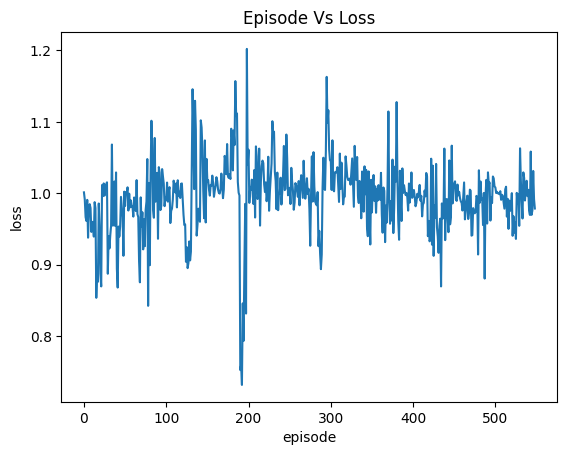

In [20]:
# Plotting epsilon vs loss
plt.plot(loss_val)
plt.xlabel('episode')
plt.ylabel('loss')
plt.title('Episode Vs Loss')
plt.show()

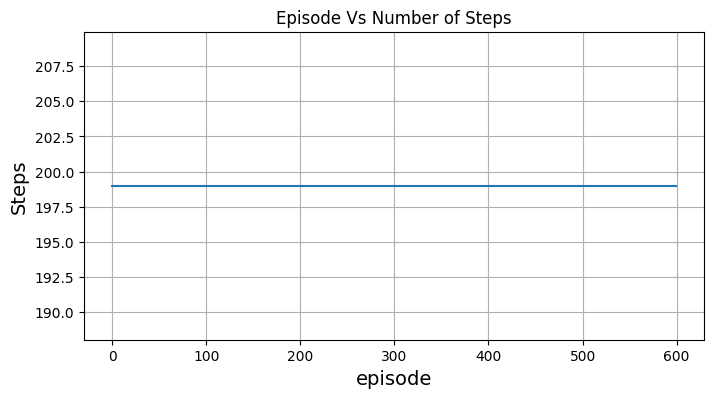

In [21]:
#plotting epsilon vs steps
plt.figure(figsize=(8, 4))
plt.plot(step_val)
plt.xlabel("episode", fontsize=14)
plt.ylabel("Steps", fontsize=14)
plt.title('Episode Vs Number of Steps')
plt.grid(True)
plt.show()

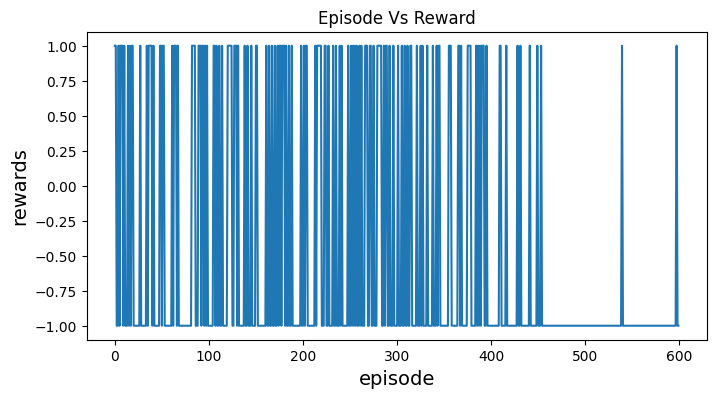

In [22]:
#plotting epsilon vs reward
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("episode", fontsize=14)
plt.ylabel("rewards", fontsize=14)
plt.title('Episode Vs Reward')
plt.show()

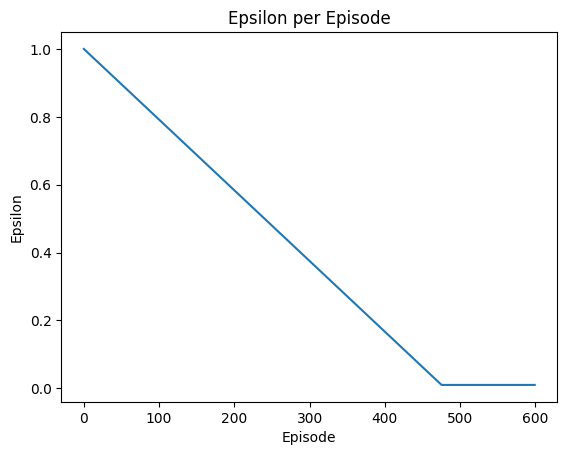

In [23]:
# Plot epsilon over episodes

plt.plot(epsilon_val)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon per Episode')
plt.show()